## Gramener Case Study

In [466]:
import importlib.util
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import datetime

## Data Sourcing 

Load and read loan.csv to loandf data frame using ISO-8859-1 encoding

In [467]:
# Load the csv file to loandf dataframe
loan_df = pd.read_csv("loan.csv", sep=',', encoding = "ISO-8859-1", low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [468]:
#Get the description of the Data

loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [469]:
#Get the information of the Data

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Assumptions

* The variables like recoveries, total_pymnt, total_pymnt_inv, total_rec_prncp etc.. which normally get captured only after a loan is accepted, will not be available at the time of a new loan application. So these type of variables can be removed from the dataset. 
* Since bankruptcy filings, tax liens and judgments are the three kinds of public records that appears on a credit report, this information should already be captured in column pub_rec which contains derogatory public records.
* purpose and title have redundant information.
* emp_title column has so much discrepancies in its values(e.g. The same employer name is mentioned in various formats) .Also as it has many unique values it would not give any useful insights about the pattern for loan defaulting. 

## Data Cleaning

In [470]:
# Get the percentage of null values for each columns where it is not equal to 0
na_percent = round(loan_df.isnull().sum() / len(loan_df.index) * 100, 2)
na_percent[na_percent > 0]

emp_title                           6.19
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m     

In [471]:
#Removing Columns with 90% or more zeros and NA’s.

master_df = pd.DataFrame(loan_df.loc[:, (na_percent < 90.00)])

# After Removing
na_percent = round(master_df.isnull().sum() / len(master_df.index) * 100, 2)
print('After Removing Columns with 90% or more zeros and NA’s.Columns which have null values and there percentage is \n', na_percent[na_percent > 0])

After Removing Columns with 90% or more zeros and NA’s.Columns which have null values and there percentage is 
 emp_title                      6.19
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64


In [472]:
#The column "mths_since_last_delinq" has more than 60% null values so remove this.

master_df.drop('mths_since_last_delinq', axis=1, inplace=True)

In [473]:
# Remove the following Columns which does not help for EDA analysis. 

column_list = ['id', 'member_id', 'grade', 'url', 'funded_amnt', 'emp_title', 'earliest_cr_line', 'pymnt_plan', 'desc',
               'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
               'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
               'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'collection_recovery_fee', 'inq_last_6mths',
               'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq']
for column in  column_list:
    master_df.drop(column, axis=1, inplace=True)

In [474]:
#Remove redundant columns and columns with same values

# Application_type has same value this shall be removed

master_df.drop('application_type', axis=1, inplace=True)

# ‘purpose’ and ‘title’ has redundant information. Purpose can be used as a categorical variable, so remove title column.
master_df.drop('title', axis=1, inplace=True)


In [475]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
loan_amnt               39717 non-null int64
funded_amnt_inv         39717 non-null float64
term                    39717 non-null object
int_rate                39717 non-null object
installment             39717 non-null float64
sub_grade               39717 non-null object
emp_length              39717 non-null object
home_ownership          39717 non-null object
annual_inc              39717 non-null float64
verification_status     39717 non-null object
issue_d                 39717 non-null object
loan_status             39717 non-null object
purpose                 39717 non-null object
zip_code                39717 non-null object
addr_state              39717 non-null object
dti                     39717 non-null float64
delinq_2yrs             39717 non-null int64
open_acc                39717 non-null int64
pub_rec                 39717 non-null int64
revol_util       

In [476]:
# Strip 'Months' from ‘Term’ Column.
master_df["term"] = master_df["term"].str.replace(" months", "").astype("int64")
# Strip '%' from ‘revol_util’ Column.
master_df["revol_util"]=master_df["revol_util"].str.replace("%", "").astype("float64")
master_df["int_rate"] = master_df["int_rate"].str.replace("%", "").astype("float64")


#There are 50 null values in revol_util. So imputing the null values with median as median & mean are almost equal
master_df.loc[master_df.revol_util.isnull(),'revol_util'] =  master_df.revol_util.median()



# Column emp_length has substring '+', '<', ‘years’ strip this.

master_df["emp_length"] = master_df["emp_length"].str.replace("< 1", "0")
master_df["emp_length"] = master_df["emp_length"].str.replace("n/a", "NAN")
intab = "+years"
outtab = "      "
trantab = str.maketrans(intab, outtab)
master_df["emp_length"] = master_df["emp_length"].str.translate(trantab).astype("float64")
master_df.emp_length.fillna(master_df.emp_length.mean(),inplace = True)
master_df['emp_length'] = round(master_df['emp_length'], 2)


In [477]:
# Convert dates to python datetime object.

master_df["issue_d"] = pd.to_datetime(master_df["issue_d"], format="%b-%y")

# funded_amnt_inv, installment, int_rate Round to 2 decimal places.

master_df["funded_amnt_inv"] = round(master_df["funded_amnt_inv"], 2)
master_df["installment"] = round(master_df["installment"], 2)


In [478]:
# impute employee length with mean
master_df.emp_length.fillna(master_df.emp_length.mean(),inplace = True)

# round to 2 decimal places
master_df['emp_length'] = round(master_df['emp_length'], 2)

In [479]:
# Check the home_ownership column
master_df["home_ownership"].value_counts()

if any("NONE" in item for item in master_df["home_ownership"]):
    master_df = master_df[master_df['home_ownership'] != 'NONE']
master_df["home_ownership"].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
Name: home_ownership, dtype: int64

In [480]:
#Remove 'xx' from 'zip_code'
master_df["zip_code"] = master_df["zip_code"].str.replace('xx', '')

#Create Address column by combining values in ‘zip_code’ and 'addr_state'

# Combine ‘zip_code’ and 'addr_state' to one column as 'address'
master_df["address"] = master_df["addr_state"].astype(str) + "," + master_df["zip_code"].astype(str)

In [481]:
#After data cleaning check which all columns have null values and and whats the percentage

na_percent = round(master_df.isnull().sum() / len(master_df.index) * 100, 2)

na_percent[na_percent > 0]

pub_rec_bankruptcies    1.75
dtype: float64

In [482]:
#Get the information of the cleaned Dataset

master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39714 entries, 0 to 39716
Data columns (total 22 columns):
loan_amnt               39714 non-null int64
funded_amnt_inv         39714 non-null float64
term                    39714 non-null int64
int_rate                39714 non-null float64
installment             39714 non-null float64
sub_grade               39714 non-null object
emp_length              39714 non-null float64
home_ownership          39714 non-null object
annual_inc              39714 non-null float64
verification_status     39714 non-null object
issue_d                 39714 non-null datetime64[ns]
loan_status             39714 non-null object
purpose                 39714 non-null object
zip_code                39714 non-null object
addr_state              39714 non-null object
dti                     39714 non-null float64
delinq_2yrs             39714 non-null int64
open_acc                39714 non-null int64
pub_rec                 39714 non-null int64
revol_ut

## Data Analysis

In [483]:
master_df.describe(include = 'all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
loan_amnt,39714,NaN,NaN,NaN,NaN,NaN,11219.9,7456.74,500,5500,10000,15000,35000
funded_amnt_inv,39714,NaN,NaN,NaN,NaN,NaN,10398.1,7128.31,0,5000,8975,14400,35000
term,39714,NaN,NaN,NaN,NaN,NaN,42.4185,10.6231,36,36,36,60,60
int_rate,39714,NaN,NaN,NaN,NaN,NaN,12.0214,3.72485,5.42,9.25,11.86,14.59,24.59
installment,39714,NaN,NaN,NaN,NaN,NaN,324.573,208.877,15.69,167.032,280.23,430.78,1305.19
sub_grade,39714,35,B3,2917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,39714,NaN,NaN,NaN,NaN,NaN,4.97361,3.51399,0,2,4.97,9,10
home_ownership,39714,4,RENT,18899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,39714,NaN,NaN,NaN,NaN,NaN,68968,63795,4000,40404.5,59000,82299,6e+06
verification_status,39714,3,Not Verified,16918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Function to display a bar chart

In [484]:
def draw_bar_chart(df, x, y, width, height, title='', xlabel='', ylabel='', legend=None, message='', showBarVals=False):
    # Restore the rc params from Matplotlib’s internal defaults.
    plt.rcdefaults() 
    
    # Set figure size
    plt.figure(figsize=(width, height))
    
    # Plot bar chart of data frame 
    ax = sns.barplot(x=x, y=y, data=df)
    
 
    if xlabel.strip():
        plt.xlabel(xlabel)
    
    if ylabel.strip():    
        plt.ylabel(ylabel)
    
    if legend is not None:
        plt.legend(legend)
    
    if title.strip():
        plt.title(title)
        
    plt.show()
    
    if message.strip():
        print(message)

#### Analysis of loans Issued per year

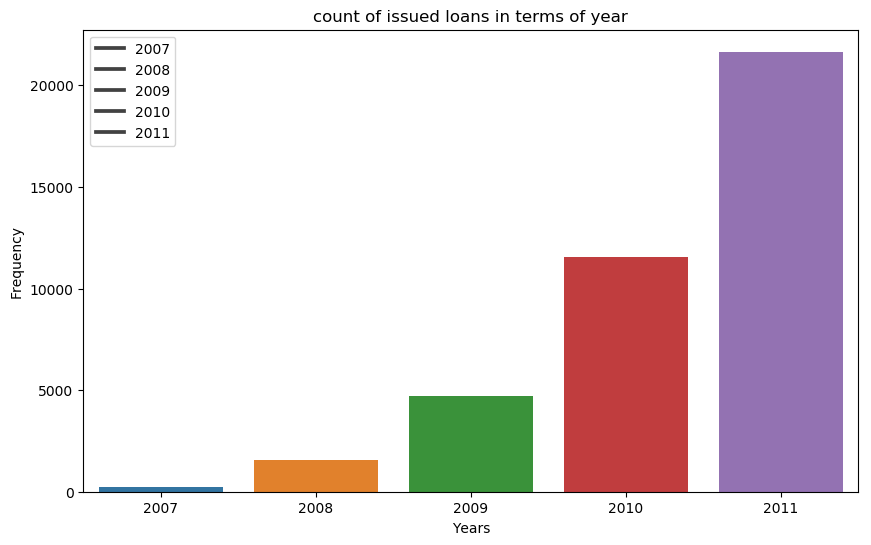

Inference: The Number of issued loans increases year by year.
	Percentage increase for year 2007 = 0.0 %
	Percentage increase for year 2008 = 527.0 %
	Percentage increase for year 2009 = 202.0 %
	Percentage increase for year 2010 = 145.0 %
	Percentage increase for year 2011 = 88.0 %


In [485]:
issue_y = master_df.groupby(master_df.issue_d.dt.year).size().reset_index(name='Frequency')
draw_bar_chart(issue_y, "issue_d", "Frequency", 10, 6,
               'count of issued loans in terms of year',
               'Years', 'Frequency', issue_y['issue_d'],
               'Inference: The Number of issued loans increases year by year.',
              True)

#percentage increase per year
current = previous = percentage_incr = 0.0
index = 0
for numloans in issue_y.Frequency:
    if current == 0.0:
        current = numloans
        previous = numloans
    else:
        previous = current
        current = numloans
    
    if previous != 0:
        percentage_incr = (current - previous) / previous * 100.0 
    elif current != 0 :
        percentage_incr = float("inf") * abs(current) / current 
    else:
        percentage_incr = 0.0
    print('\tPercentage increase for year', issue_y.issue_d[index], '=', round(percentage_incr), '%')
    index += 1 

# Restore the rc params from Matplotlib’s internal defaults.
plt.rcdefaults() 



### Analysis of Debt-To-Income Ratio(dti)

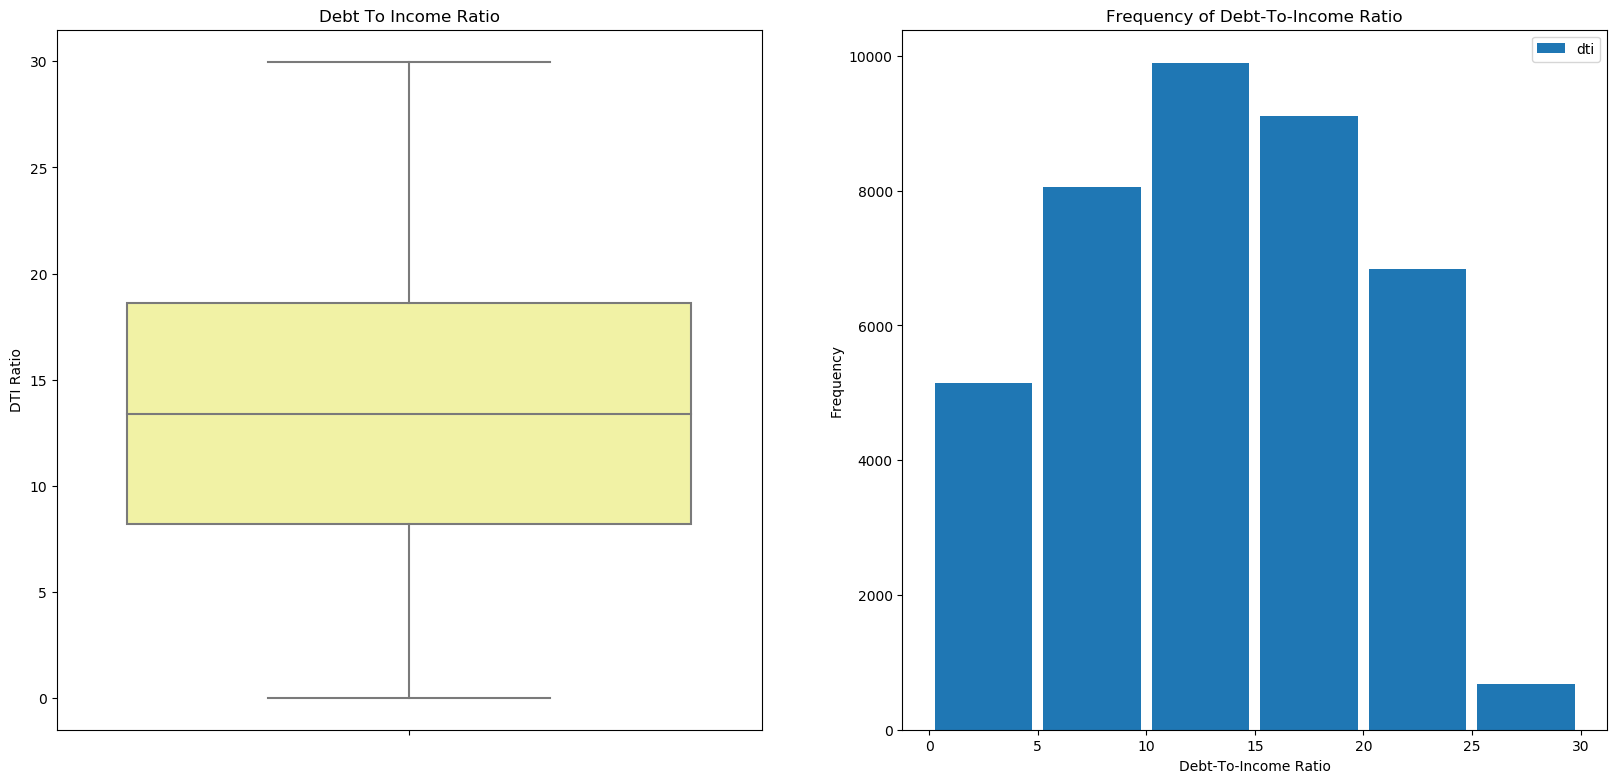

Inference: 
	dti values are equally distributed along the median between 25-75 percentile with max value, 
	Approximately at 30, minimum at 0 and maximum borrowers given loan having DTI value between 10-15% 



In [486]:
# Debt-To-Income Ratio(dti) is the percentage of a consumer's monthly gross income that goes 
# toward paying debts excluding mortgage and the requested LC loan

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
ax = sns.boxplot(y='dti', data=master_df, palette='terrain_r')
plt.ylabel('DTI Ratio')
plt.title('Debt To Income Ratio')

#Frequency Chart 
dti = master_df['dti']
legend = ['dti']
plt.subplot(2,2,2)
plt.hist([dti], bins=6, rwidth=0.9)
plt.xlabel("Debt-To-Income Ratio")
plt.ylabel("Frequency")
plt.legend(legend)
plt.xticks(np.arange(min(dti), max(dti)+5, 5))
plt.title('Frequency of Debt-To-Income Ratio')
plt.show()

print('Inference: \n\tdti values are equally distributed along the median between 25-75 percentile with max value,',
      '\n\tApproximately at 30, minimum at 0 and maximum borrowers given loan having DTI value between 10-15% \n')

### Analysis of Delinquency in past 2 Years(delinq_2yrs)

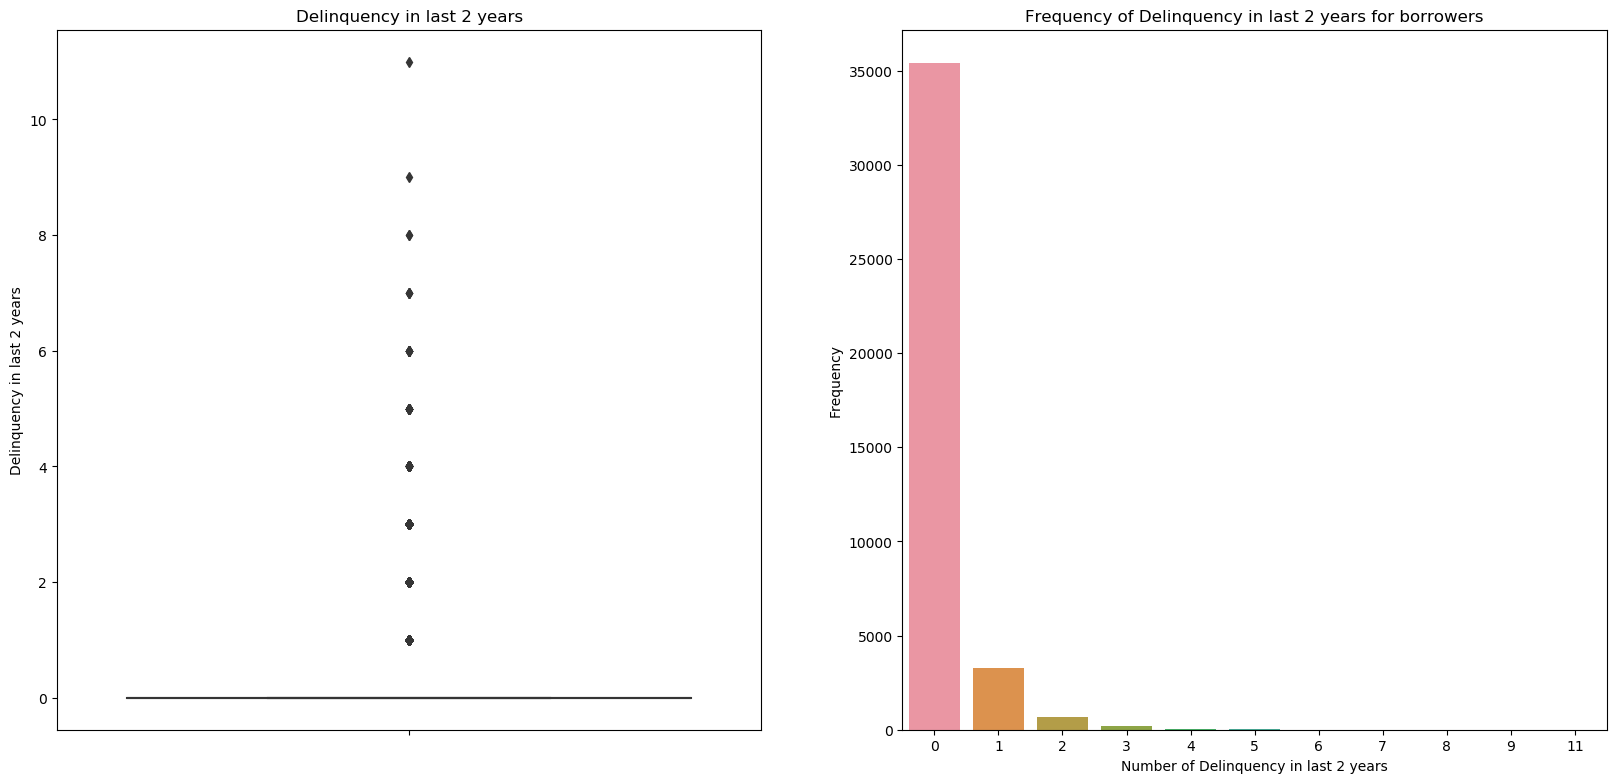

Inference:
	Most of the delinq_2yrs values are 0 and hence highest frequency is for value 0. 
	There are some outliers and the max value is 11.



In [487]:
# Delinquency in past 2 Years(delinq_2yrs) is The number of 30+ days past-due incidences of delinquency
# ( failure to make a required payment )in the borrower's credit file for the past 2 years

#plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
ax = sns.boxplot(y='delinq_2yrs', data=master_df, palette='viridis')
plt.ylabel('Delinquency in last 2 years')
plt.title('Delinquency in last 2 years')

#Frequency Chart 
delinq_2yrs_values = pd.DataFrame(master_df['delinq_2yrs'].value_counts())
plt.subplot(2,2,2)
ax = sns.barplot(x=delinq_2yrs_values.index, y="delinq_2yrs", data=delinq_2yrs_values)

plt.xlabel("Number of Delinquency in last 2 years")
plt.ylabel("Frequency")
plt.title('Frequency of Delinquency in last 2 years for borrowers')
plt.show()

print('Inference:\n\tMost of the delinq_2yrs values are 0 and hence highest frequency is for value 0.',
      '\n\tThere are some outliers and the max value is 11.\n')


### Analysis of Number of open credit lines in the borrower's credit file(open_acc)

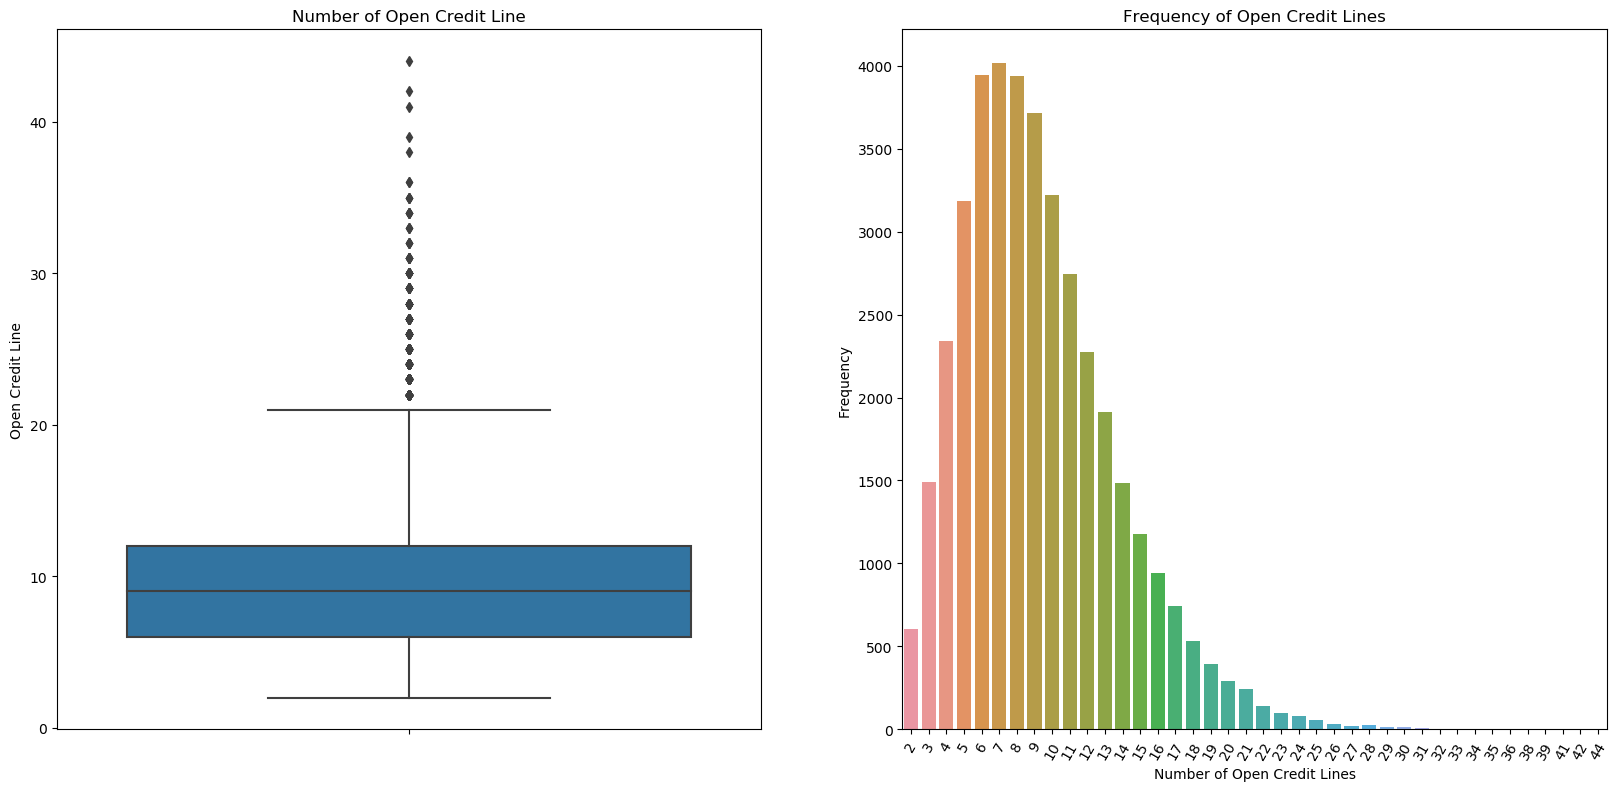

Inference:
	open_acc values seems equally distributed along the median(9) for 25-75 percentile with some outliers.



In [488]:
# Number of open credit lines in the borrower's credit file(open_acc)

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.boxplot(y=master_df['open_acc'])
plt.ylabel('Open Credit Line')
plt.title('Number of Open Credit Line')

#Frequency Chart 
open_acc_values = pd.DataFrame(master_df['open_acc'].value_counts())
plt.subplot(2,2,2)
ax = sns.barplot(x=open_acc_values.index, y="open_acc", data=open_acc_values)

plt.xlabel("Number of Open Credit Lines")
plt.ylabel("Frequency")
plt.title('Frequency of Open Credit Lines')
plt.xticks(rotation=60)
plt.show()

print('Inference:\n\topen_acc values seems equally distributed along the median(9) for 25-75 percentile with some outliers.\n')


#### Analysis of Number of derogatory public records(pub_rec)

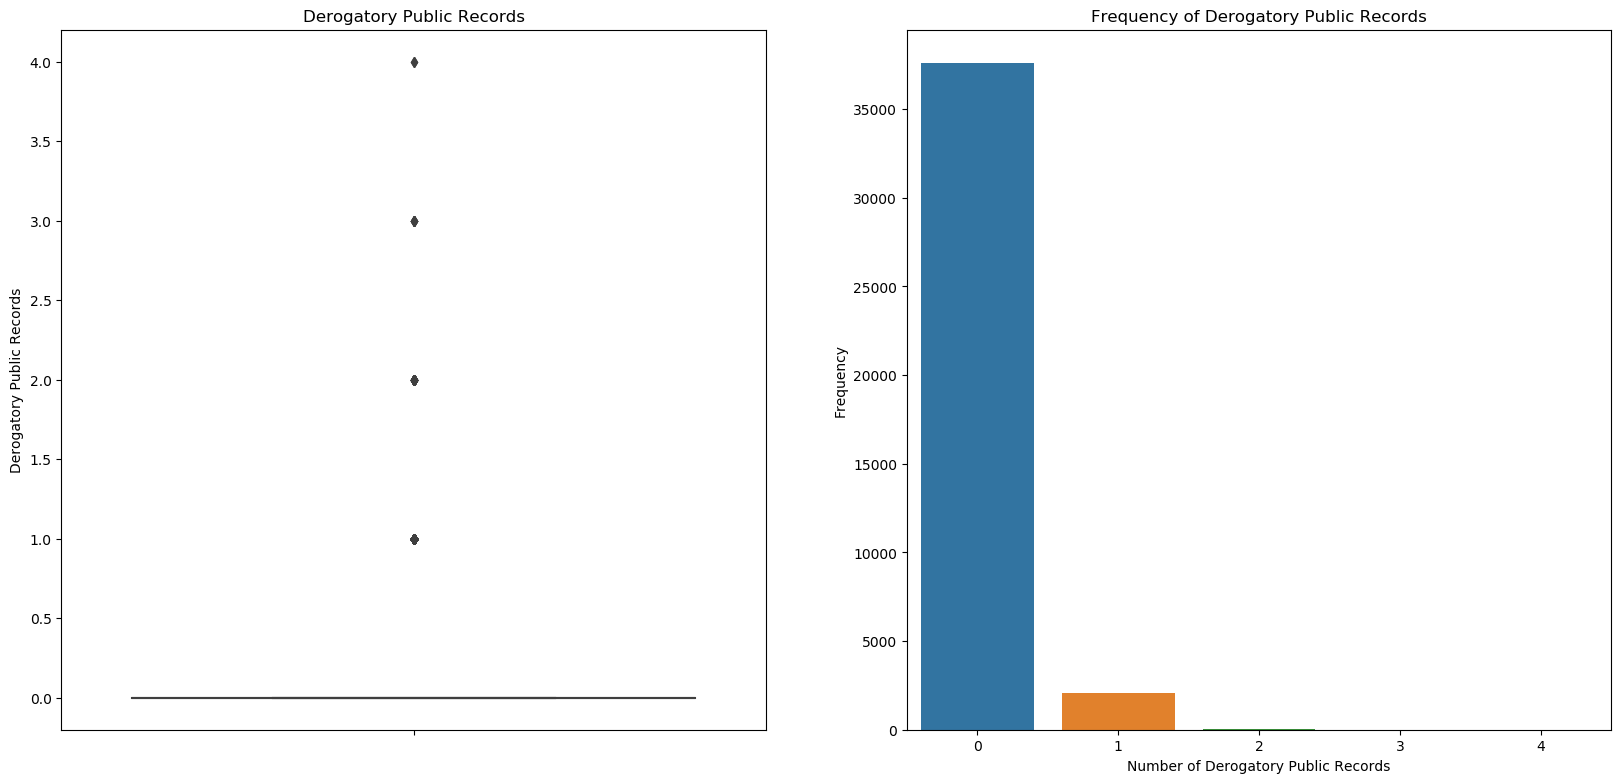

Inference: Most of the pub_rec values are 0.There are outliers in the  column and the max value is 4. 



In [489]:
# Number of derogatory public records(pub_rec)
# Public records and collections are derogatory items in credit report because they all reflect financial obligations
# that were not paid as agreed

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.boxplot(y=master_df['pub_rec'])
plt.ylabel('Derogatory Public Records')
plt.title('Derogatory Public Records')

#Frequency Chart 
pub_rec_values = pd.DataFrame(master_df['pub_rec'].value_counts())
plt.subplot(2,2,2)
ax = sns.barplot(x=pub_rec_values.index, y="pub_rec", data=pub_rec_values)
plt.xlabel("Number of Derogatory Public Records")
plt.ylabel("Frequency")
plt.title('Frequency of Derogatory Public Records')
plt.show()

print('Inference: Most of the pub_rec values are 0.There are outliers in the  column and the max value is 4. \n')

#### Analysis of Revolving line utilization rate(revol_util)

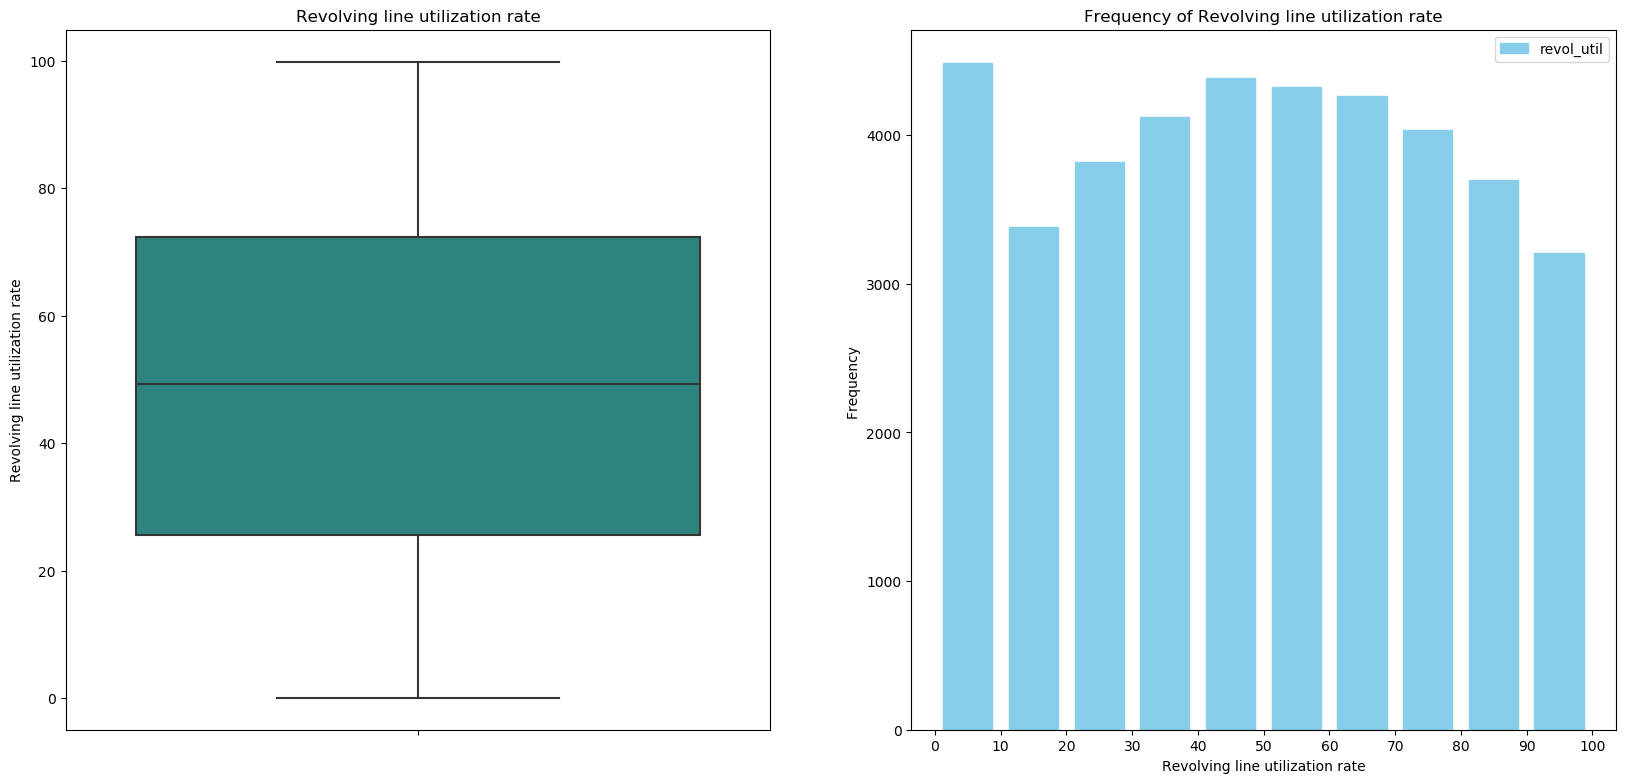

Inference:
	'revol_util' values are equally distributed along the median between 25-75 percentile with max value near 100,
	and maximum borrowers having revolving credit utilisation rate in between 0-10%.


In [490]:
#Revolving line utilization rate(revol_util)

# Ploting revo_util column
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(y=master_df['revol_util'], palette='viridis')
plt.ylabel('Revolving line utilization rate')
plt.title('Revolving line utilization rate')

#Frequency Chart
revol_util = master_df['revol_util']
legend = ['revol_util']
plt.subplot(2,2,2)
plt.hist([revol_util], color = "skyblue", ec="skyblue", bins=10, rwidth=0.75)
plt.xlabel("Revolving line utilization rate")
plt.ylabel("Frequency ")
plt.xticks(np.arange(min(revol_util), max(revol_util)+10, 10))
plt.legend(legend)
plt.title('Frequency of Revolving line utilization rate')
plt.show()

print('Inference:\n\t\'revol_util\' values are equally distributed along the median between 25-75 percentile',
      'with max value near 100,\n'
      '\tand maximum borrowers having revolving credit utilisation rate in between 0-10%.')

### Analysis of quantitative variable loan_amnt

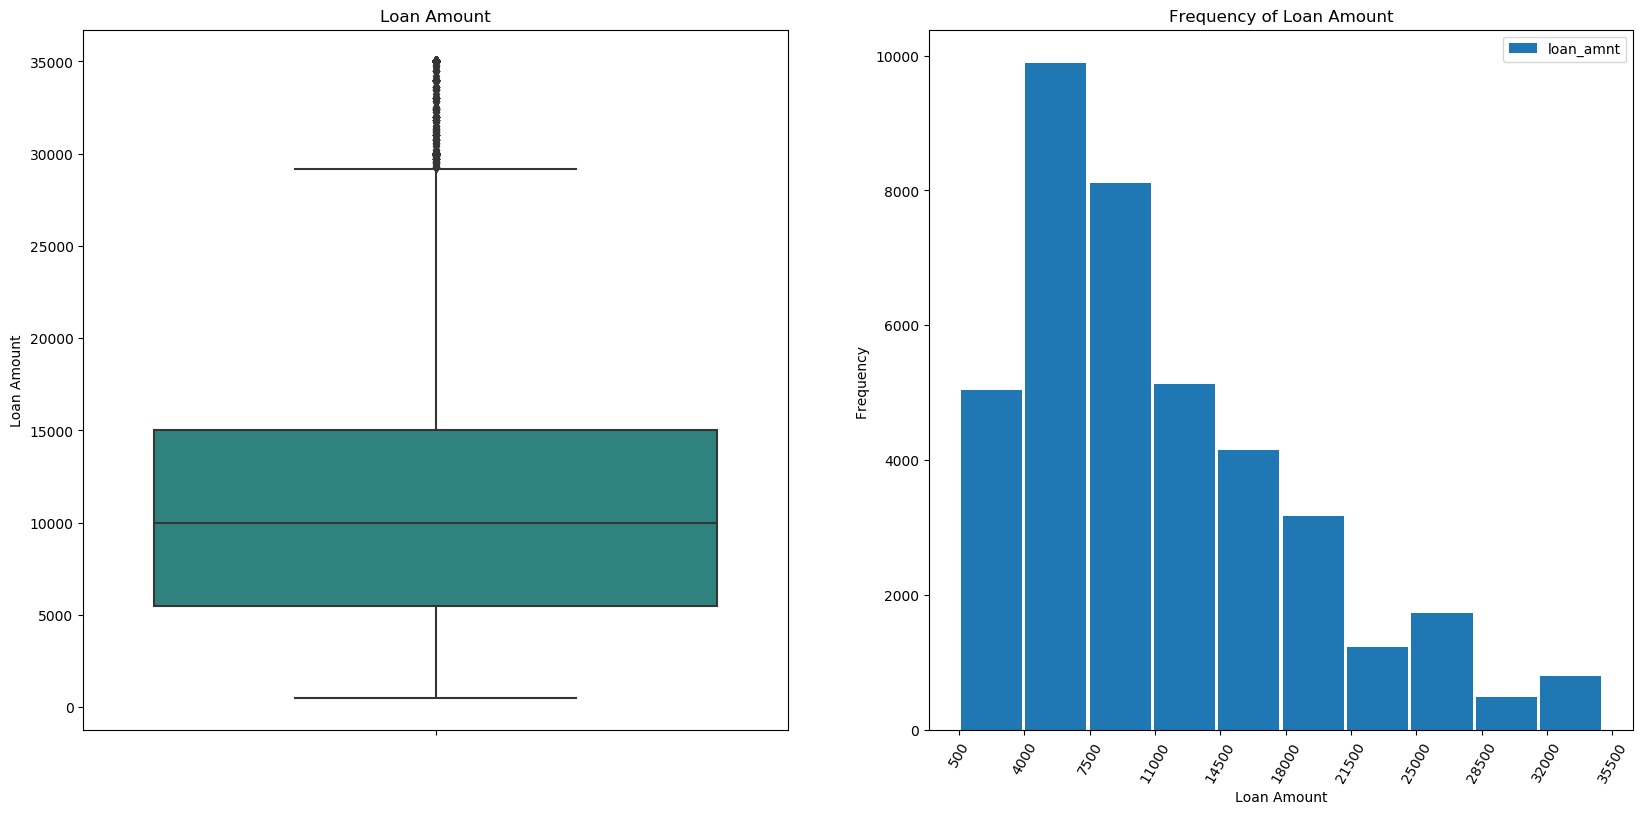

Inference:
	The 'Loan Amount' most frequently taken is between $4000 to $7500. But there are clearly some outliers above 98 percentile.


In [491]:
#-------------------------------------------------------------------
# The Variable loan_amnt quantitative variables
#-------------------------------------------------------------------

# Plotting the distribution plot of loan_amnt to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(y=master_df['loan_amnt'], palette='viridis')
plt.ylabel('Loan Amount')
plt.title('Loan Amount')

#Frequency Chart
loan_amnt = master_df['loan_amnt']
legend = ['loan_amnt']
plt.subplot(2,2,2)
plt.hist([loan_amnt], bins=10, rwidth=0.95)
plt.xlabel("Loan Amount")
plt.ylabel("Frequency ")
plt.xticks(np.arange(min(loan_amnt), max(loan_amnt)+3500, 3500), rotation=60)
plt.legend(legend)
plt.title('Frequency of Loan Amount')
plt.show()

print('Inference:\n\tThe \'Loan Amount\' most frequently taken is between $4000 to $7500.',
      'But there are clearly some outliers above 98 percentile.')

#### Analysis of quantitative variable funded_amnt_inv

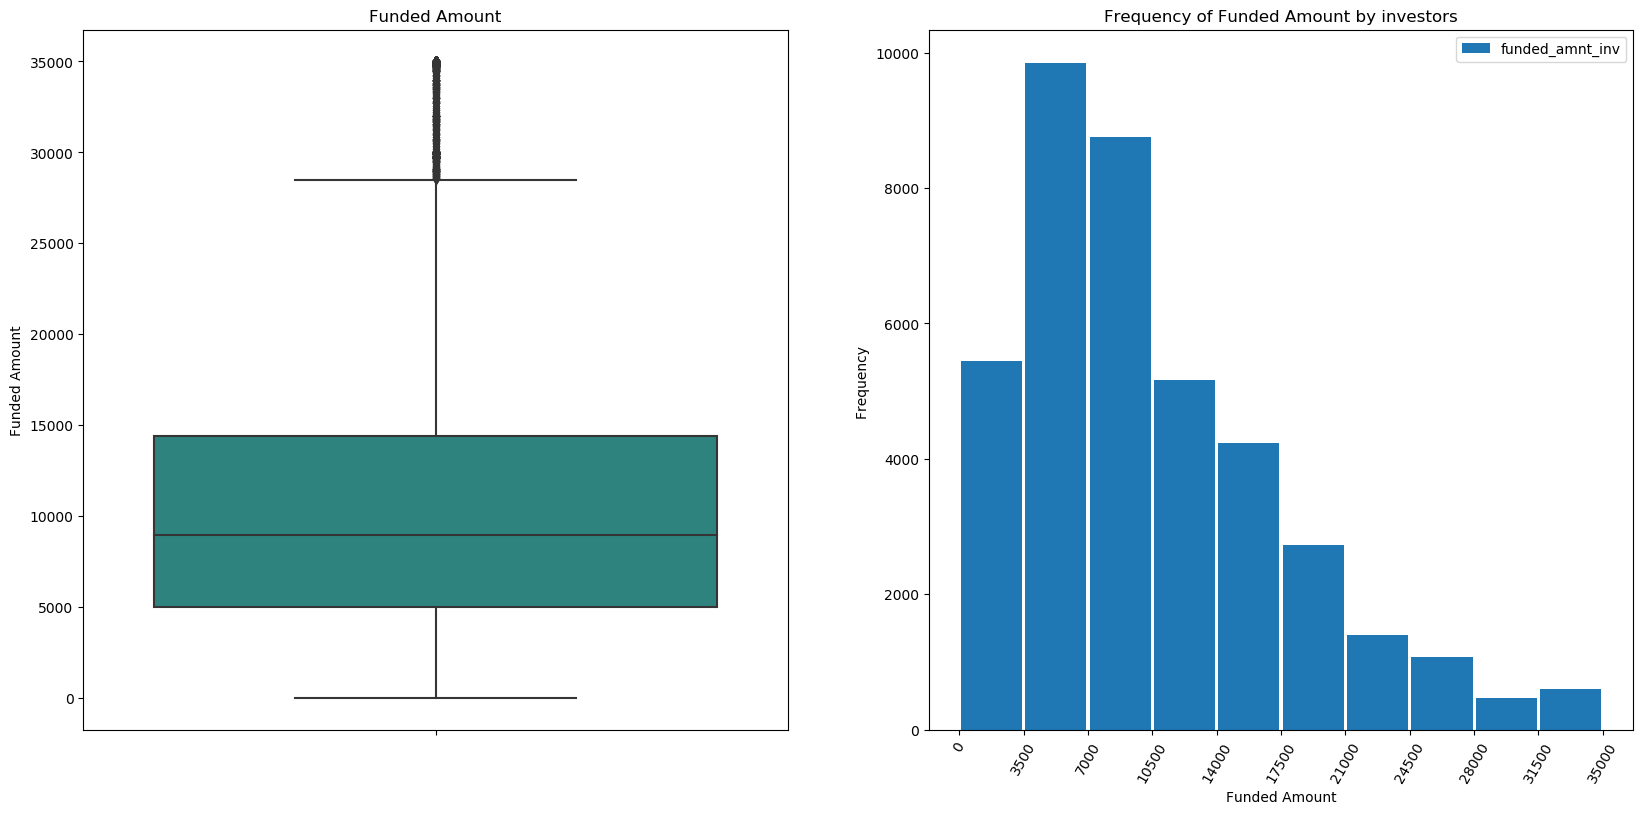

Inference:
	From the 'Funded Amount investors' most frequently invested is between $3500 to $7000 . But there are clearly some outliers above 98 percentile.


In [492]:
# Plotting the distribution plot of funded_amnt_inv to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(y=master_df['funded_amnt_inv'], palette='viridis')
plt.ylabel('Funded Amount')
plt.title('Funded Amount')

#Frequency Chart
funded_amnt_inv = master_df['funded_amnt_inv']
legend = ['funded_amnt_inv']
plt.subplot(2,2,2)
plt.hist([funded_amnt_inv], bins=10, rwidth=0.95)
plt.xlabel("Funded Amount")
plt.ylabel("Frequency ")
plt.xticks(np.arange(min(funded_amnt_inv), max(funded_amnt_inv)+3500, 3500), rotation=60)
plt.legend(legend)
plt.title('Frequency of Funded Amount by investors')
plt.show()

print('Inference:\n\tFrom the \'Funded Amount investors\' most frequently invested is between $3500 to $7000 .',
      'But there are clearly some outliers above 98 percentile.')

### Analysis of quantitative variable int_rate

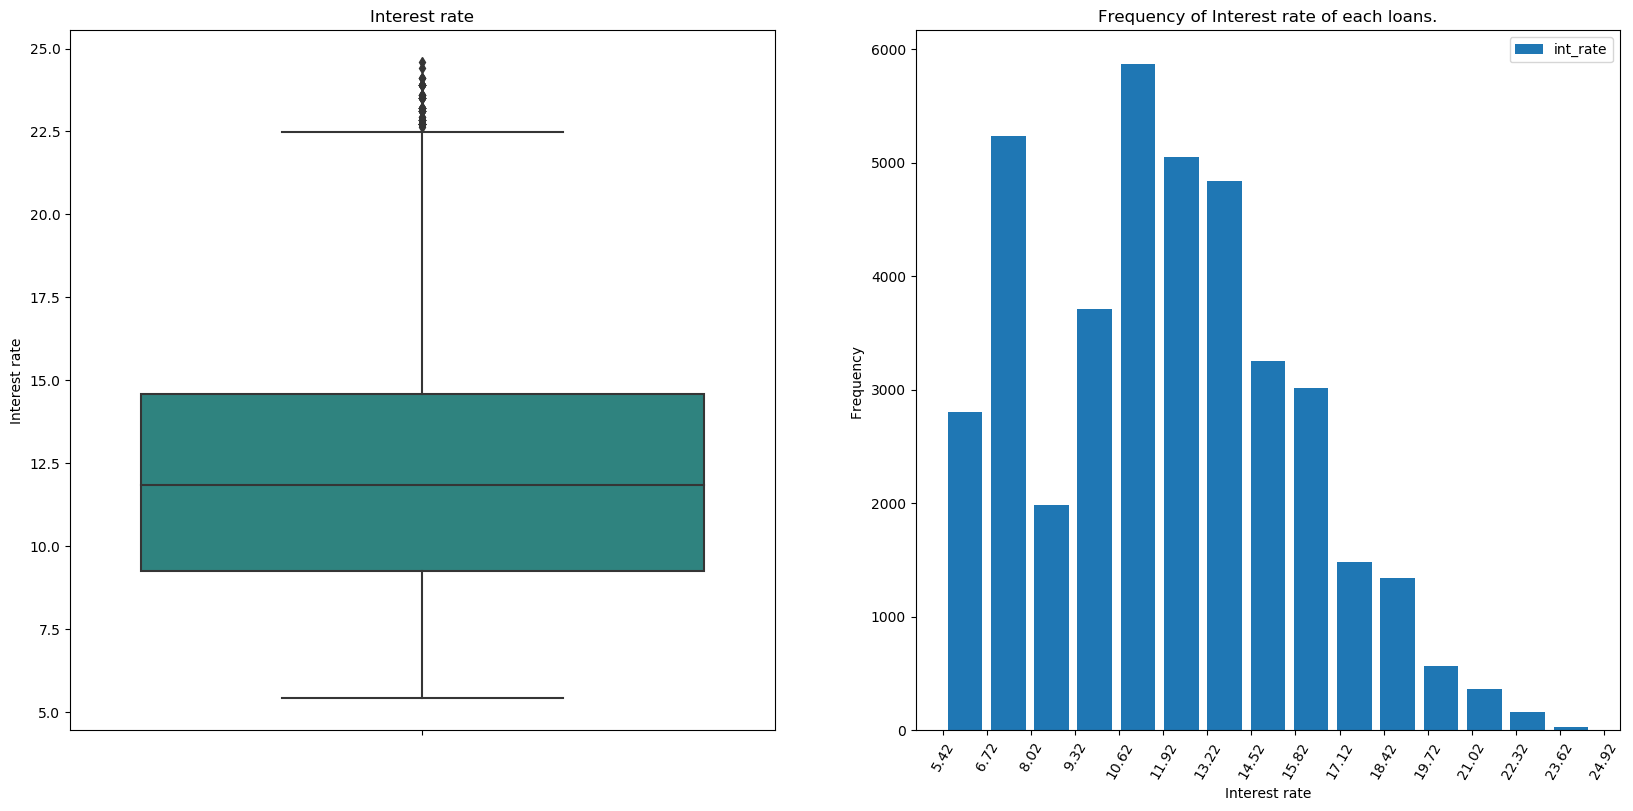

Inference:
	From the 'Interest rate' most frequent Interest rate is between 10.6% to 11.9% . But there are clearly some outliers above 98 percentile.


In [493]:
# Plotting the distribution plot of int_rate to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(y=master_df['int_rate'], palette='viridis')
plt.ylabel('Interest rate')
plt.title('Interest rate')

#Frequency Chart
int_rate = master_df['int_rate']
legend = ['int_rate']
plt.subplot(2,2,2)
plt.hist([int_rate], bins=15, rwidth=0.80)
plt.xlabel("Interest rate")
plt.ylabel("Frequency ")
plt.xticks(np.arange(min(int_rate), max(int_rate)+1.3, 1.3), rotation=60)
plt.legend(legend)
plt.title('Frequency of Interest rate of each loans.')
plt.show()

print('Inference:\n\tFrom the \'Interest rate\' most frequent Interest rate is between 10.6% to 11.9% .',
      'But there are clearly some outliers above 98 percentile.')

### Analysis of purpose for taking loan given by the borrower

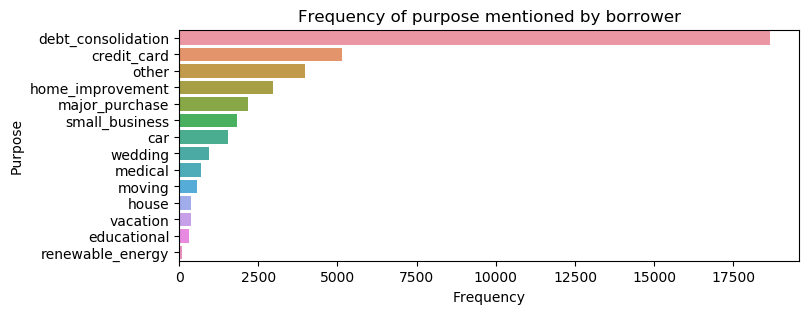

Inference: Most of the loans are taken for debt Consolidation.



In [494]:
#-------------------------------------------------------------------
# The Variable purpose is an Unordered Categorical
#-------------------------------------------------------------------

# Plot purpose for taking loan in a horizontal bar chart 
purpose = pd.DataFrame(master_df['purpose'].value_counts())
draw_bar_chart(purpose, 'purpose', purpose.index, 8, 3,
               'Frequency of purpose mentioned by borrower', 'Frequency', 'Purpose',
               None, 'Inference: Most of the loans are taken for debt Consolidation.\n',
               False)

### Analysis of term column

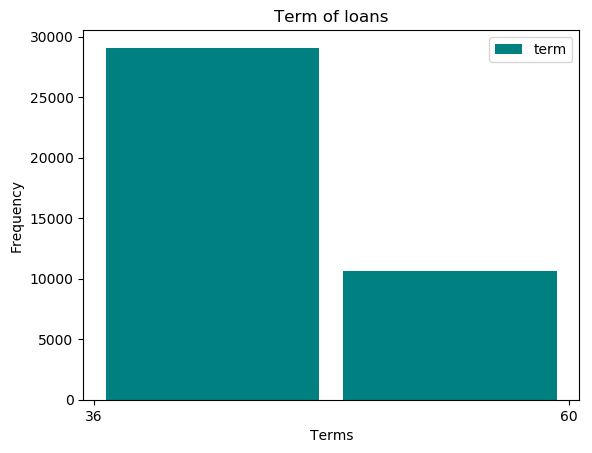

Inference:
	The most frequent term for loans is 36 months.


In [495]:
terms = master_df['term']

legend = ['term']
plt.hist([terms], bins=2, rwidth=0.90, color='teal')
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.xticks(terms.unique())
plt.legend(legend)
plt.title('Term of loans')
plt.show()

print('Inference:\n\tThe most frequent term for loans is 36 months.')

#### Analysis of installment

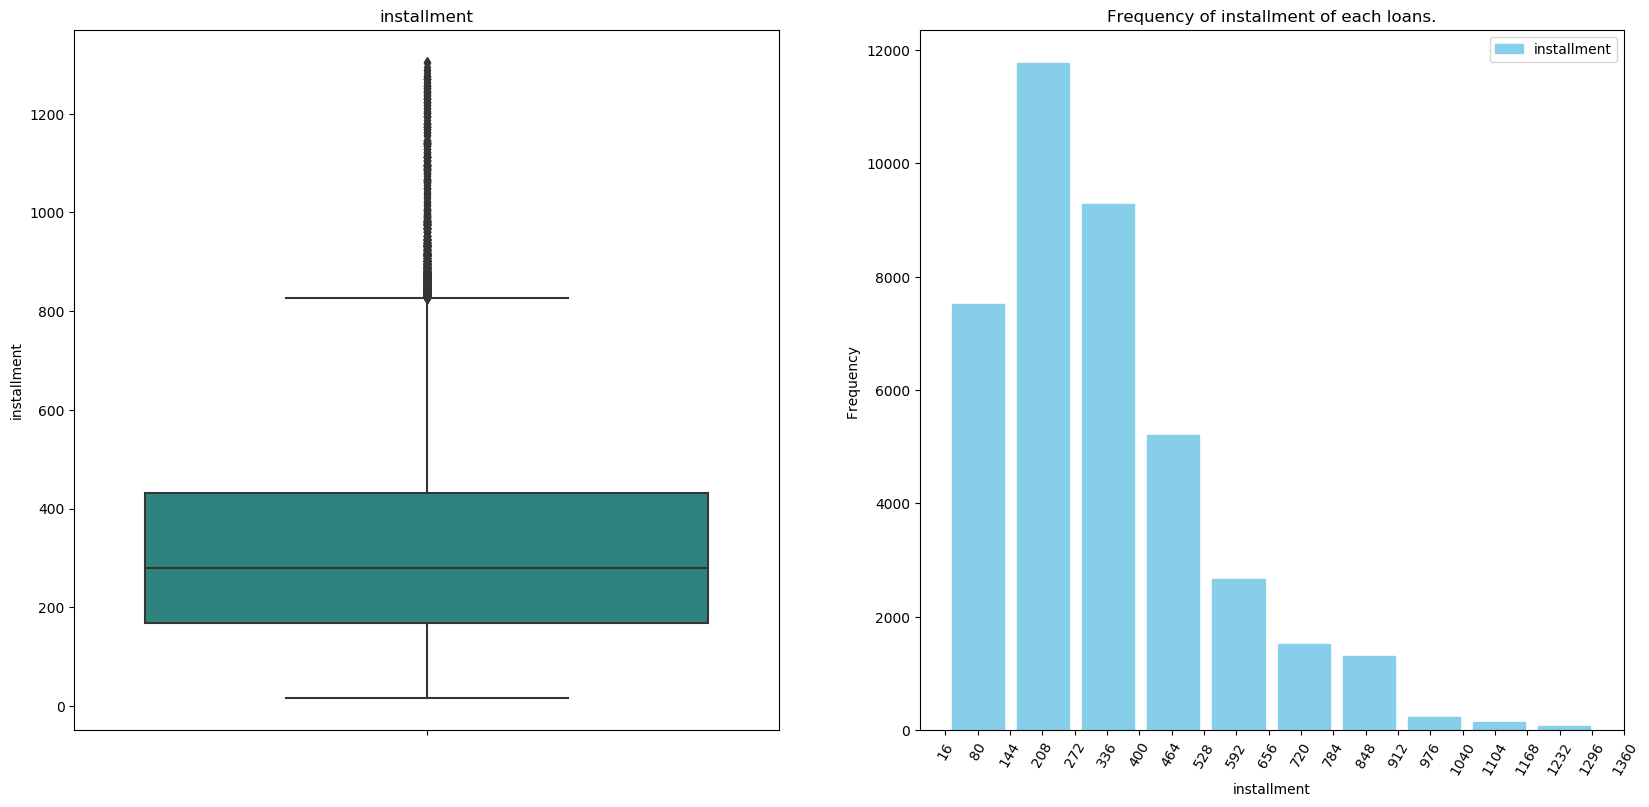

Inference:
	From the 'installment' column most frequent installment is between 144 to 270 . But there are clearly some outliers above 98 percentile.


In [496]:
# Plotting the distribution plot of installment to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(y=master_df['installment'], palette='viridis')
plt.ylabel('installment')
plt.title('installment')

#Frequency Chart
installment = master_df['installment']
legend = ['installment']
plt.subplot(2,2,2)
plt.hist([installment], color = "skyblue", ec="skyblue", bins=10, rwidth=0.80)
plt.xlabel("installment")
plt.ylabel("Frequency ")
plt.legend(legend)
plt.xticks(np.arange(min(installment), max(installment)+64, 64), rotation=60)
plt.title('Frequency of installment of each loans.')
plt.show()

print('Inference:\n\tFrom the \'installment\' column most frequent installment is between 144 to 270 .',
      'But there are clearly some outliers above 98 percentile.')

#### Analysis of Home Owner Ship variable

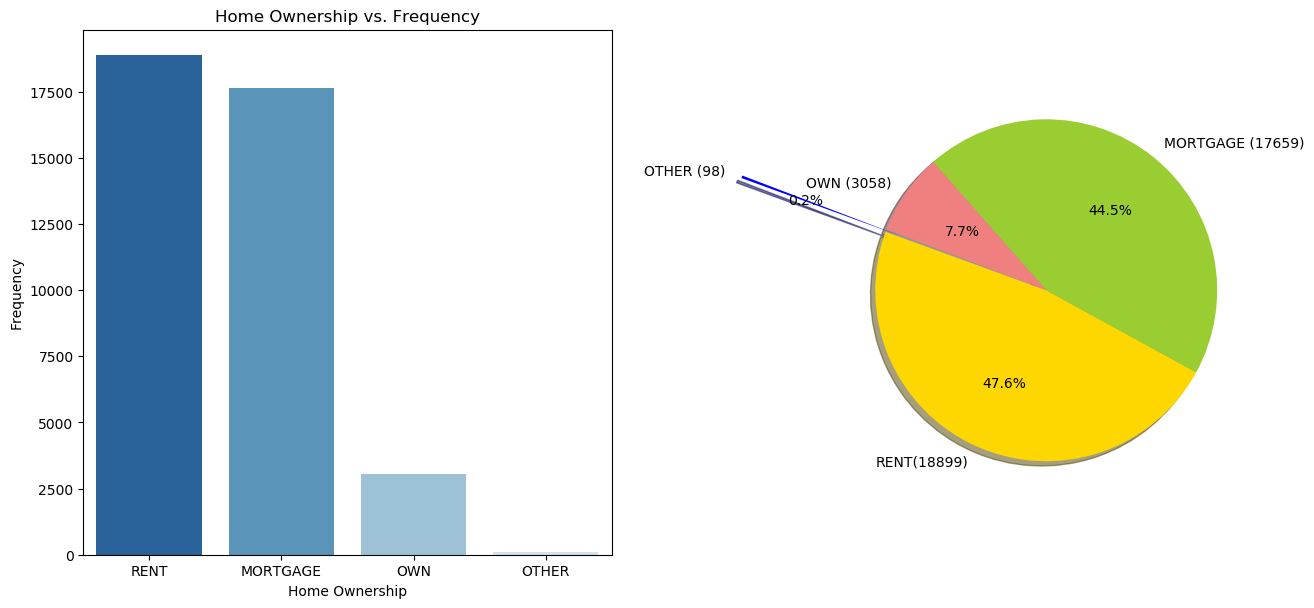

Inference:
	People who are staying on rented house are taking most of the loans, 
	Followed by people staying in a mortgaged home.


In [497]:
home_ownership = master_df["home_ownership"].value_counts()
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)

ax = sns.barplot(x=home_ownership.index, y=home_ownership, palette=sns.color_palette("Blues_r", 4))

plt.xlabel("Home Ownership")
plt.ylabel("Frequency")
plt.title('Home Ownership vs. Frequency')

# Data's to plot
chart_label_home_ownership = [home_ownership.index[0] + "(" + str(home_ownership.iloc[0]) + ')',
                              home_ownership.index[1] + " (" + str(home_ownership.iloc[1]) + ')',
                              home_ownership.index[2] + " (" + str(home_ownership.iloc[2]) + ')',
                              home_ownership.index[3] + " (" + str(home_ownership.iloc[3]) + ')']

colors = ['gold', 'yellowgreen', 'lightcoral', 'b']
explode = (0, 0, 0, 0.9)  # explode 1st slice

# Plot pie chart
plt.subplot(2,2,2)
plt.pie(home_ownership,explode=explode,labels=chart_label_home_ownership, colors=colors,autopct='%1.1f%%', shadow=True, startangle=160)
plt.axis('equal')
plt.show()

print('Inference:\n\tPeople who are staying on rented house are taking most of the loans,',
      '\n\tFollowed by people staying in a mortgaged home.')

#### Analysis of annual income variable

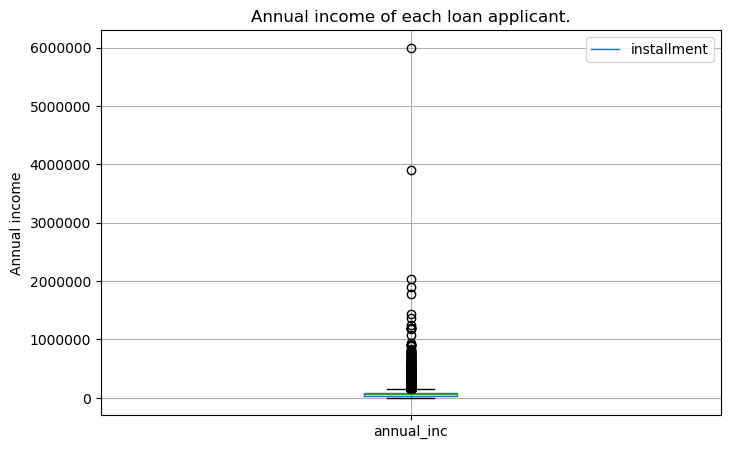

Inference:
	From the 'Annual income', there are outliers due to which the visualisation is not very effective


In [498]:
# Plott the distribution plot for annual_inc to visualise their distribution

# Plotting the distribution plot of annual_inc to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(8,5))
master_df.boxplot(column='annual_inc')
plt.ylabel('Annual income')
plt.legend(legend)
plt.title('Annual income of each loan applicant.')
plt.show()

annual_inc_mode = master_df['annual_inc'].mode()
print('Inference:\n\tFrom the \'Annual income\', there are outliers due to which the visualisation is not very effective')

### Removing outliers in annual Income

In [499]:
master_df = master_df[master_df.annual_inc <=master_df.annual_inc.quantile(.98)]
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38920 entries, 0 to 39716
Data columns (total 22 columns):
loan_amnt               38920 non-null int64
funded_amnt_inv         38920 non-null float64
term                    38920 non-null int64
int_rate                38920 non-null float64
installment             38920 non-null float64
sub_grade               38920 non-null object
emp_length              38920 non-null float64
home_ownership          38920 non-null object
annual_inc              38920 non-null float64
verification_status     38920 non-null object
issue_d                 38920 non-null datetime64[ns]
loan_status             38920 non-null object
purpose                 38920 non-null object
zip_code                38920 non-null object
addr_state              38920 non-null object
dti                     38920 non-null float64
delinq_2yrs             38920 non-null int64
open_acc                38920 non-null int64
pub_rec                 38920 non-null int64
revol_ut

#### Plotting annual income after removing outliers

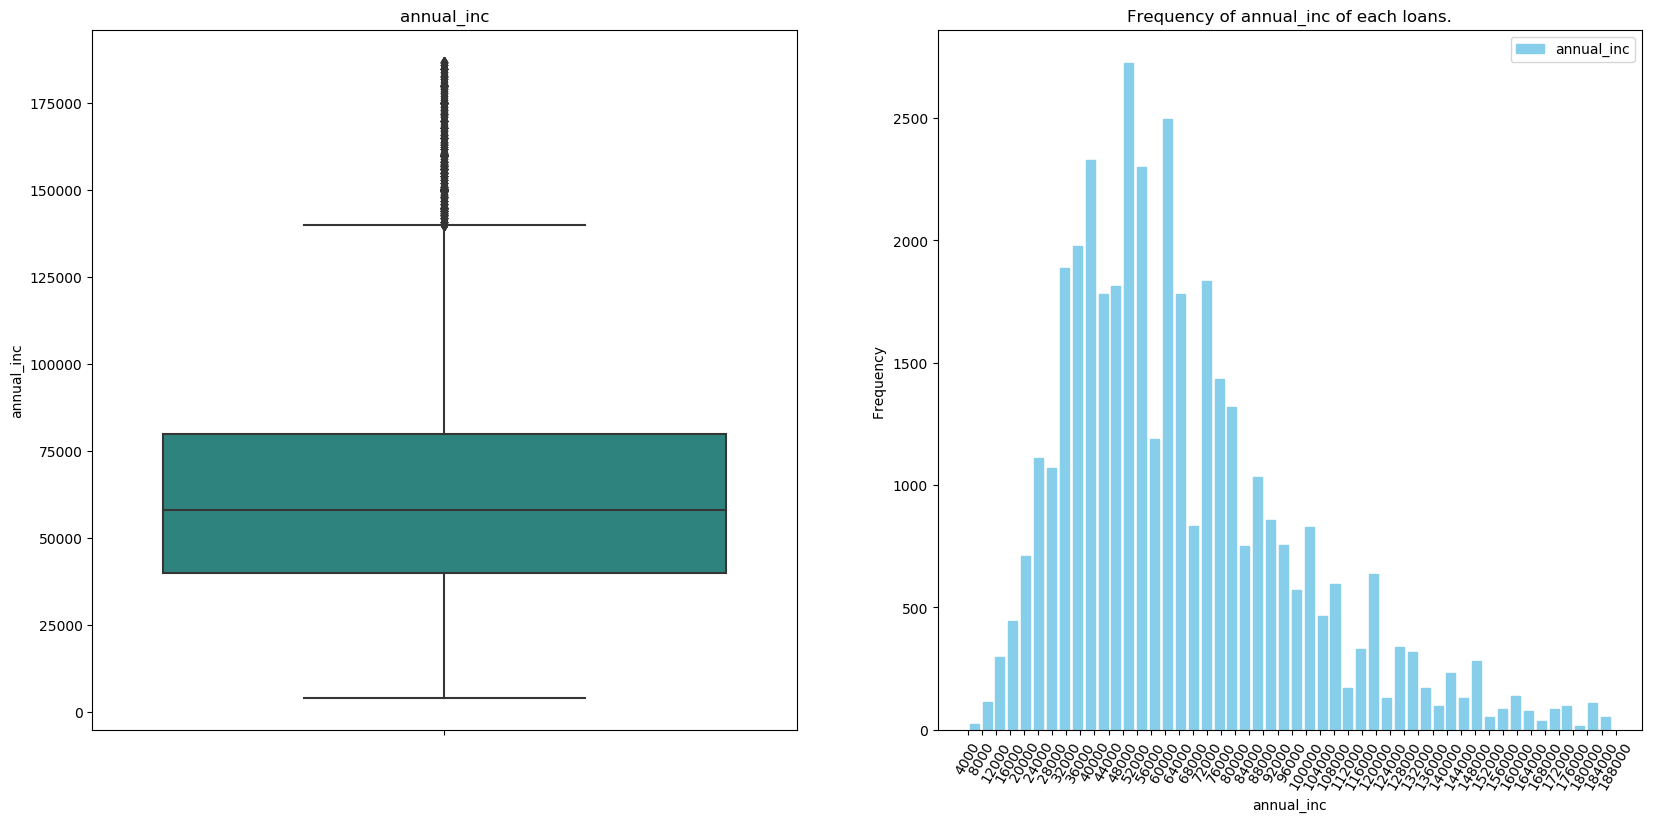

Inference:
	After removing the outliers the 'annual_inc' column, 	most frequent income range is between $46000 to $52000.


In [500]:
# Plotting the distribution plot of installment to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(y=master_df['annual_inc'], palette='viridis')
plt.ylabel('annual_inc')
plt.title('annual_inc')

#Frequency Chart
annual_inc = master_df['annual_inc']
legend = ['annual_inc']
plt.subplot(2,2,2)
plt.hist([annual_inc], color = "skyblue", ec="skyblue", bins=50, rwidth=0.70)
plt.xlabel("annual_inc")
plt.ylabel("Frequency ")
plt.legend(legend)
plt.xticks(np.arange(min(annual_inc), max(annual_inc)+4000, 4000), rotation=60)
plt.title('Frequency of annual_inc of each loans.')
plt.show()

print('Inference:\n\tAfter removing the outliers the \'annual_inc\' column,',
      '\tmost frequent income range is between $46000 to $52000.')

#### Analysis of loan status

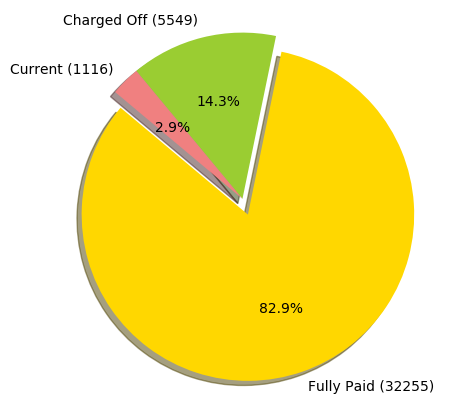

Inference: Most of the loans in the data set are fully paid and only a small percentage of loans are current loans.



In [501]:
#-------------------------------------------------------------------
# The Variable loan_status is an Unordered Categorical
#-------------------------------------------------------------------
loan_status = pd.DataFrame(master_df['loan_status'].value_counts())

# Data's to plot
chart_label_loan_status = ["Fully Paid (" + str(loan_status.loc['Fully Paid'].values[0]) + ')',
                           "Charged Off (" + str(loan_status.loc['Charged Off'].values[0]) + ')',
                           "Current (" + str(loan_status.loc['Current'].values[0]) + ')']

colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(5, 5))
plt.pie(loan_status, explode=explode, labels=chart_label_loan_status, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

print('Inference: Most of the loans in the data set are fully paid and only a small percentage of loans are current loans.\n')

#### Univaritate analysis of address(combination of zipcode and state)

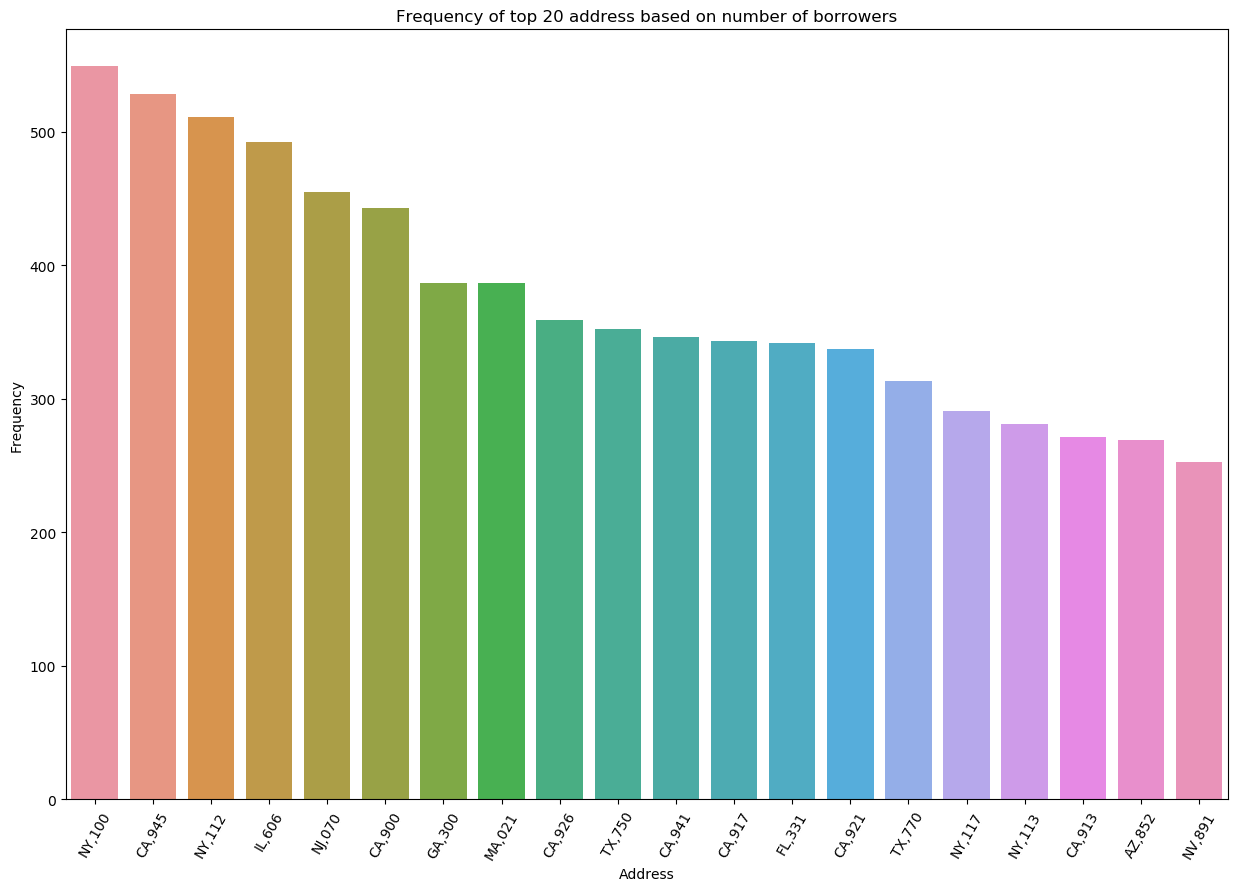

Inference:
	Maximum number of borrowers are from address NY,100 of loans to whom loans are given



In [502]:
#Address of borrower(Combination of State and zipcode)

#Frequency Chart 
plt.figure(figsize=(15, 10))
# Restore the rc params from Matplotlib’s internal defaults.
plt.rcdefaults() 
#Plotting top 20 address(State and zip code) based on borrowers whom loan is given
address_values = pd.DataFrame(master_df['address'].value_counts())[:20]

ax = sns.barplot(x=address_values.index, y="address", data=address_values)
plt.xlabel("Address")
plt.ylabel("Frequency")
plt.title('Frequency of top 20 address based on number of borrowers')
plt.xticks(rotation=60)
plt.show()
print('Inference:\n\tMaximum number of borrowers are from address NY,100 of loans to whom loans are given\n')

### Derived Metrics

### Business Driven Metrics : loan_default_status
Define a new cloumn loan_default_status which categorises the loan_status into 2 categories "Defaulter"(if loan status is "charged off" and Non-Defaulter if loan status is "Fully Paid" or "Current"

In [503]:
master_df['loan_default_status'] = master_df['loan_status'].apply(lambda x: 'Defaulter' if x == 'Charged Off' else 'Non-Defaulter') 
print('Number of defaulters and Non-Defaulters after merging Current and Fully Paid as Non Defaulter \n',master_df.groupby('loan_default_status')['loan_default_status'].count(),'\n\n')

Number of defaulters and Non-Defaulters after merging Current and Fully Paid as Non Defaulter 
 loan_default_status
Defaulter         5549
Non-Defaulter    33371
Name: loan_default_status, dtype: int64 




### Data Driven Metrics : instal_income_perc
Define a new cloumn instal_income_perc which is the ratio of installment monthly income(annual_inc/12) multplied by 100

In [504]:
master_df['instal_income_perc'] = ((master_df['installment'])/(master_df['annual_inc']/12))*100
master_df.head(10)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,pub_rec_bankruptcies,address,loan_default_status,instal_income_perc
0,5000,4975.0,36,10.65,162.87,B2,10.0,RENT,24000.0,Verified,...,AZ,27.65,0,3,0,83.7,0.0,"AZ,860",Non-Defaulter,8.143500
1,2500,2500.0,60,15.27,59.83,C4,0.0,RENT,30000.0,Source Verified,...,GA,1.00,0,3,0,9.4,0.0,"GA,309",Defaulter,2.393200
2,2400,2400.0,36,15.96,84.33,C5,10.0,RENT,12252.0,Not Verified,...,IL,8.72,0,2,0,98.5,0.0,"IL,606",Non-Defaulter,8.259549
3,10000,10000.0,36,13.49,339.31,C1,10.0,RENT,49200.0,Source Verified,...,CA,20.00,0,10,0,21.0,0.0,"CA,917",Non-Defaulter,8.275854
4,3000,3000.0,60,12.69,67.79,B5,1.0,RENT,80000.0,Source Verified,...,OR,17.94,0,15,0,53.9,0.0,"OR,972",Non-Defaulter,1.016850
5,5000,5000.0,36,7.90,156.46,A4,3.0,RENT,36000.0,Source Verified,...,AZ,11.20,0,9,0,28.3,0.0,"AZ,852",Non-Defaulter,5.215333
6,7000,7000.0,60,15.96,170.08,C5,8.0,RENT,47004.0,Not Verified,...,NC,23.51,0,7,0,85.6,0.0,"NC,280",Non-Defaulter,4.342099
7,3000,3000.0,36,18.64,109.43,E1,9.0,RENT,48000.0,Source Verified,...,CA,5.35,0,4,0,87.5,0.0,"CA,900",Non-Defaulter,2.735750
8,5600,5600.0,60,21.28,152.39,F2,4.0,OWN,40000.0,Source Verified,...,CA,5.55,0,11,0,32.6,0.0,"CA,958",Defaulter,4.571700
9,5375,5350.0,60,12.69,121.45,B5,0.0,RENT,15000.0,Verified,...,TX,18.08,0,2,0,36.5,0.0,"TX,774",Defaulter,9.716000


### Type Driven Metrics : interest_rate_bracket
Define a bracket for interested rate and see how each bracket is performing against loan status

In [505]:
master_df['interest_rate_bracket'] = master_df['int_rate'].apply(lambda x :'0-5' if x <=5 else ('5-10' if x<=10 else ('10-15' if x <=15 else ('15-20' if x<=20 else('20-25' if x <=25 else '25+')))))
master_df[['int_rate','interest_rate_bracket']].head(10)

,int_rate,interest_rate_bracket
0,10.65,10-15
1,15.27,15-20
2,15.96,15-20
3,13.49,10-15
4,12.69,10-15
5,7.90,5-10
6,15.96,15-20
7,18.64,15-20
8,21.28,20-25
9,12.69,10-15


### Segmented Univariate Analysis
Segmented Analysis of state wise loan_status

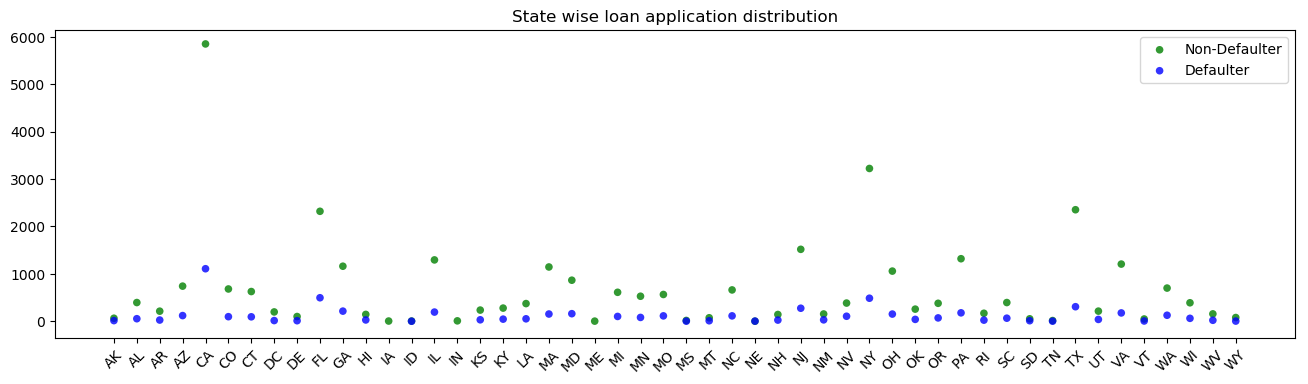

Inference:
 	The state CA has most of the loans...
	The state CA has most of the 'Non-Defaulted' loans...
	The state CA has most of the 'Defaulted' loans...
Conclusion: State CA tops in both Non-Defaulter and Defaulter catagories of loans.



In [506]:
#------------------------------------------------------------------------------------------------------------
# The Variable addr_state is an Unordered Categorical 
# lets do a segmented analysis on loan_status using this variable
#------------------------------------------------------------------------------------------------------------

# Rank-frequency plots of unordered categorical variables, when plotted on a log-log scale, 
# typically result in a power law distribution

# Create data
g1 = pd.DataFrame(master_df[master_df.loan_default_status == 'Non-Defaulter']['addr_state'].value_counts())
g2 = pd.DataFrame(master_df[master_df.loan_default_status == 'Defaulter']['addr_state'].value_counts())
 
data = (g1, g2)
colors = ("green", "blue")
groups = ("Non-Defaulter", "Defaulter") 
 
# Create plot
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

for data, color, group in zip(data, colors, groups):
    x = data.index
    y = data.addr_state
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    
plt.title('State wise loan application distribution')
plt.legend(loc=1)
plt.xticks(rotation=45)
plt.show()

# Which state has most of the loan application ?
print('Inference:\n \tThe state CA has most of the loans...')

# Which state code has most of the 'Fully Paid' loan application status?
print('\tThe state CA has most of the \'Non-Defaulted\' loans...')

# Which state code has most of the Charged Off loan application status?
print('\tThe state CA has most of the \'Defaulted\' loans...')

print('Conclusion: State CA tops in both Non-Defaulter and Defaulter catagories of loans.\n')

### Segmented analysis of Zip Code wise loan_status of state CA

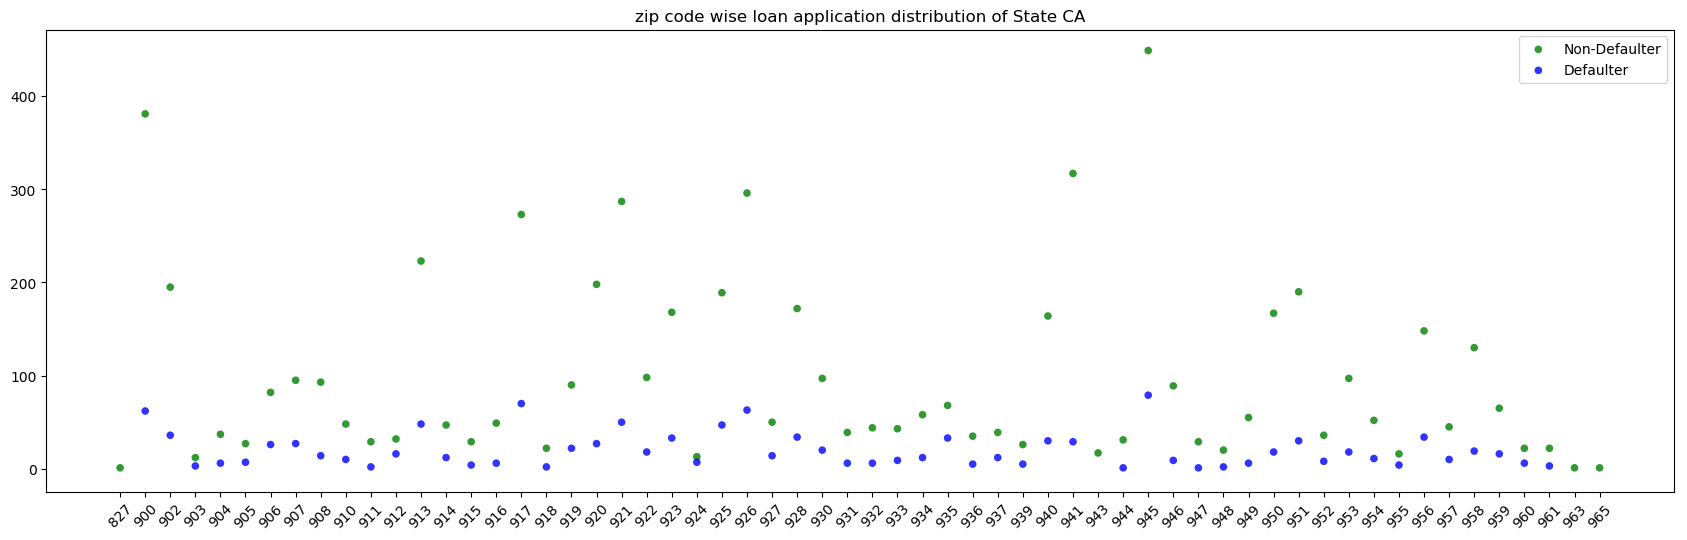

Inference:
 	The zip code '945' in state CA has most of the loans...
	The zip code '945' in state CA has most of the Non-Defaulted loans...
	The zip code '945' in state CA has most of the Defaulted loans...
Conclusion: zip code '945' at State CA tops in Non-Defaulter and Defaulter catagories of loans.



In [507]:
#-------------------------------------------------------------------
# The Variable zip_code is an Unordered Categorical variable
#-------------------------------------------------------------------

# Rank-frequency plots of unordered categorical variables, when plotted on a log-log scale, 
# typically result in a power law distribution

# Create data
CA_df = pd.DataFrame(master_df[master_df.addr_state == 'CA'])

g1 = pd.DataFrame(CA_df[CA_df.loan_default_status == 'Non-Defaulter']['zip_code'].value_counts())
g2 = pd.DataFrame(CA_df[CA_df.loan_default_status == 'Defaulter']['zip_code'].value_counts())
 
data = (g1, g2)
colors = ("green", "blue")
groups = ("Non-Defaulter", "Defaulter") 
 
# Create plot
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
fig = plt.figure(figsize=(21, 6))
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

for data, color, group in zip(data, colors, groups):
    x = data.index
    y = data.zip_code
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    
plt.title('zip code wise loan application distribution of State CA')
plt.legend(loc=1)
plt.xticks(rotation=45)
plt.show()


#Which zip code in CA has most of the loan applicaitons?
print('Inference:\n \tThe zip code \'945\' in state CA has most of the loans...')

#Which zip code in CA has most of the loan applicaitons status as Fully Paid?
print('\tThe zip code \'945\' in state CA has most of the Non-Defaulted loans...')

#Which zip code in CA has most of the loan applicaitons status as Charged Off?
print('\tThe zip code \'945\' in state CA has most of the Defaulted loans...')

print('Conclusion: zip code \'945\' at State CA tops in Non-Defaulter and Defaulter catagories of loans.\n')

### Segmented analysis based on loan status for loan amount, funded amount and interest rate.

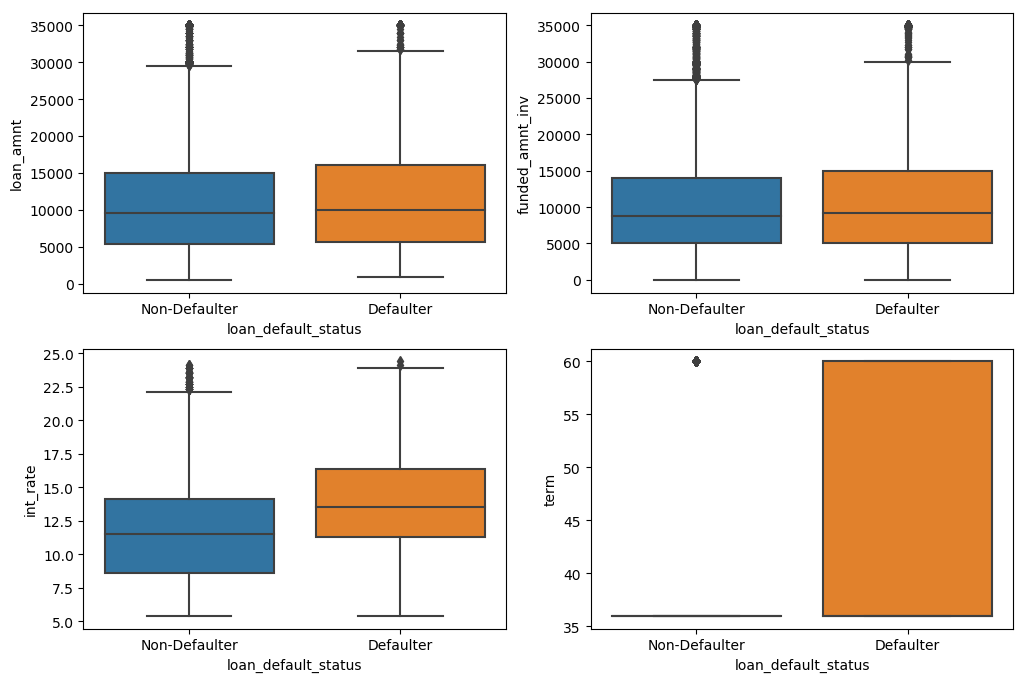

Inference:
 	 The loan_amnt and funded_amnt_inv has almost equal spread and median for defaulted and non-defaulted loans...

	 The interest rate bracket for defaulted loans is clearly higher than non-defaulted loans...

	Almost All the loans Defaulted are given for 60 months interval...

Conclusion: 60 months term loans and higher interest loans have maximum chances of defaulting


In [508]:
plt.rcdefaults()
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x="loan_default_status", y="loan_amnt", data=master_df)

plt.subplot(2, 2, 2)
sns.boxplot(x="loan_default_status",  y="funded_amnt_inv", data=master_df)

plt.subplot(2, 2, 3)
sns.boxplot(x="loan_default_status", y="int_rate", data=master_df)

plt.subplot(2, 2, 4)
sns.boxplot(x="loan_default_status", y="term", data=master_df)

plt.show()


print('Inference:\n \t The loan_amnt and funded_amnt_inv has almost equal spread and median for defaulted and non-defaulted loans...\n')

print('\t The interest rate bracket for defaulted loans is clearly higher than non-defaulted loans...\n')

print('\tAlmost All the loans Defaulted are given for 60 months interval...\n')

print('Conclusion: 60 months term loans and higher interest loans have maximum chances of defaulting')


### Segmented univariate for instal_income_perc for each loan_default_status

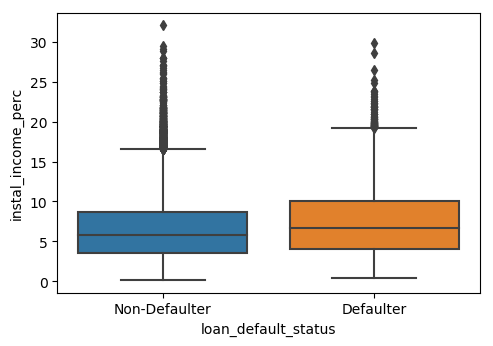

Inference:
 	 The installment to income perc is slightly higher for defaulted loans than non-defaulted loans...



In [509]:
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x="loan_default_status", y="instal_income_perc", data=master_df)


plt.show()


print('Inference:\n \t The installment to income perc is slightly higher for defaulted loans than non-defaulted loans...\n')


### Segmented Analysis of sub grade

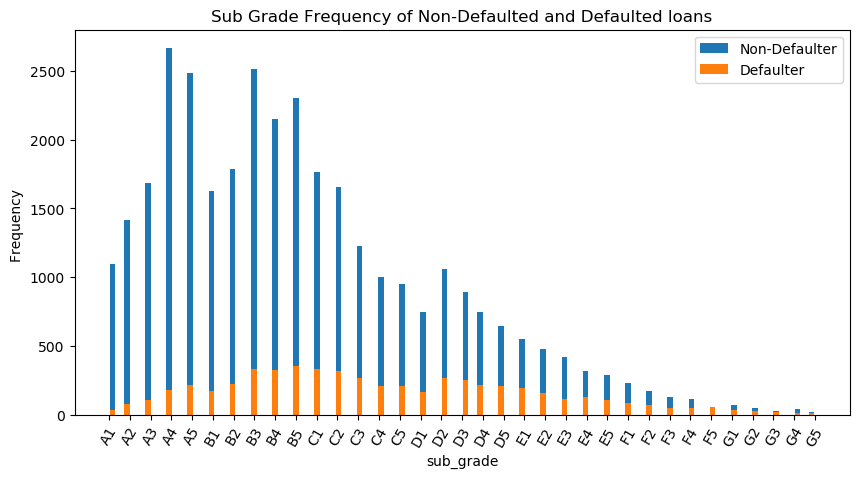

Inference:
	Lower the sub-grade higher is the chances of defaulting.. 


In [510]:
#Frequency Chart
sub_grade_fp = master_df[master_df.loan_default_status == 'Non-Defaulter'].sub_grade
sub_grade_co = master_df[master_df.loan_default_status == 'Defaulter'].sub_grade

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(10,5))

plt.hist(sub_grade_fp, bins=100, rwidth=0.80)
plt.hist(sub_grade_co, bins=100, rwidth=0.80)

plt.xlabel("sub_grade")
plt.ylabel("Frequency ")

plt.legend(master_df.loan_default_status)
plt.xticks(rotation=60)

plt.title('Sub Grade Frequency of Non-Defaulted and Defaulted loans')

plt.show()

print('Inference:\n\tLower the sub-grade higher is the chances of defaulting.. ')

### Segmented univariate for interest_rate_bracket for each loan_default_status

Get the percentage of defaults for each of  the loan brackets

loan_default_status    Defaulter  Non-Defaulter
interest_rate_bracket                          
10-15                      14.54          85.46
15-20                      23.63          76.37
20-25                      34.59          65.41
5-10                        6.73          93.27

Inference: Nearly 35% of loans in the interest bracket 20-25% have been defaulted followed by 15-20% interest bracket which has defaulted loan of 24%



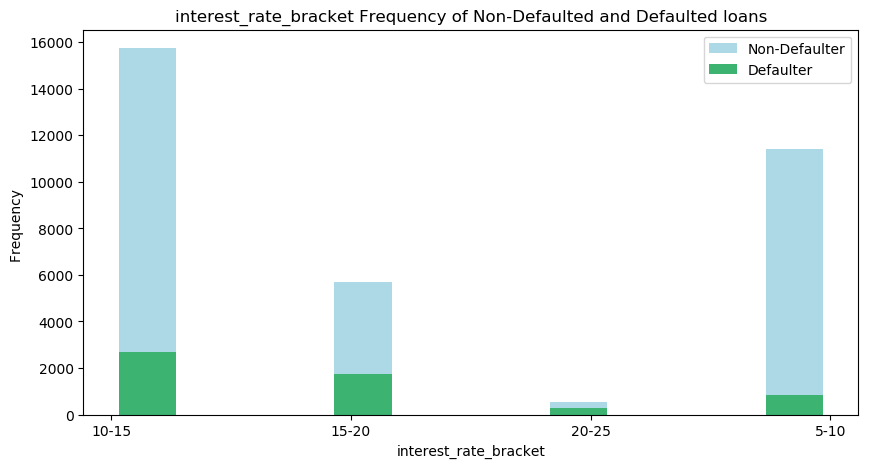

In [511]:
print("Get the percentage of defaults for each of  the loan brackets\n")
loan_stat_per_interest_bracket = pd.crosstab(master_df['interest_rate_bracket'],master_df['loan_default_status']).apply(lambda r: round((r/r.sum()*100),2), axis=1)
print(loan_stat_per_interest_bracket);

print("\nInference: Nearly 35% of loans in the interest bracket 20-25% have been defaulted followed by 15-20% interest bracket which has defaulted loan of 24%\n")\

#Frequency Chart
emp_length_fp = master_df[master_df.loan_default_status == 'Non-Defaulter']['interest_rate_bracket']
emp_length_co = master_df[master_df.loan_default_status == 'Defaulter'].interest_rate_bracket

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(10, 5))

plt.hist(emp_length_fp, bins=10, rwidth=0.80, color='lightblue')
plt.hist(emp_length_co, bins=10, rwidth=0.80, color='mediumseagreen')

plt.xlabel("interest_rate_bracket")
plt.ylabel("Frequency ")

plt.legend(master_df.loan_default_status, loc='upper right')

plt.title('interest_rate_bracket Frequency of Non-Defaulted and Defaulted loans')

plt.show()

### Segmented analysis of employment length

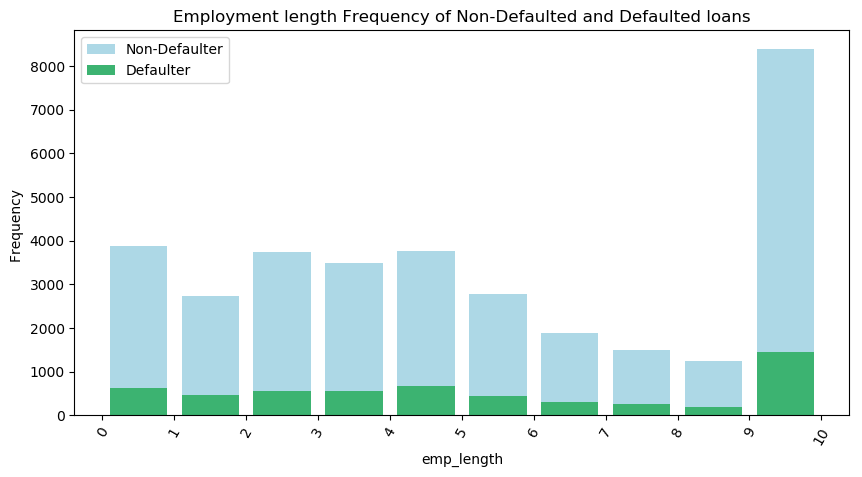

Inference:
	 Lower experience employees tend to default more on loan payment than high experience employees..


In [512]:
#Frequency Chart
emp_length_fp = master_df[master_df.loan_default_status == 'Non-Defaulter']['emp_length']
emp_length_co = master_df[master_df.loan_default_status == 'Defaulter'].emp_length

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(10, 5))

plt.hist([emp_length_fp], bins=10, rwidth=0.80, color='lightblue')
plt.hist([emp_length_co], bins=10, rwidth=0.80, color='mediumseagreen')

plt.xlabel("emp_length")
plt.ylabel("Frequency ")

plt.legend(master_df.loan_default_status, loc='upper left')
plt.xticks(np.arange(min(emp_length_co), max(emp_length_co)+1, 1), rotation=60)
plt.title('Employment length Frequency of Non-Defaulted and Defaulted loans')

plt.show()

print('Inference:\n\t Lower experience employees tend to default more on loan payment than high experience employees..')

### Segmented Analysis of Verification status

Get the percentage of defaults for each of  the verification status category

loan_default_status  Defaulter  Non-Defaulter
verification_status                          
Not Verified             12.66          87.34
Source Verified          14.50          85.50
Verified                 16.23          83.77
Verification statuses unique values  ['Verified' 'Source Verified' 'Not Verified']


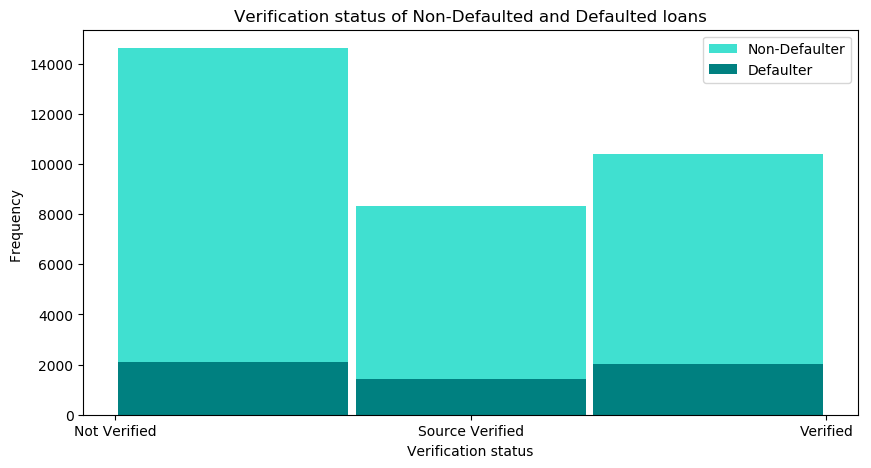

Inference:
	 Maxiumum percentage(16%) of loans sanctioned in "Verified" category have been defaulted in loan while Not Verified have the least(12%)


In [513]:
print("Get the percentage of defaults for each of  the verification status category\n")
loan_stat_for_verification = pd.crosstab(master_df['verification_status'],master_df['loan_default_status']).apply(lambda r: round((r/r.sum()*100),2), axis=1)
print(loan_stat_for_verification)



print('Verification statuses unique values ', master_df.verification_status.unique())
verification_status_fp = master_df[master_df.loan_default_status == 'Non-Defaulter'].verification_status
verification_status_co = master_df[master_df.loan_default_status == 'Defaulter'].verification_status

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(10,5))

plt.hist(verification_status_fp, bins=verification_status_fp.nunique(), rwidth=0.97, color='turquoise')
plt.hist(verification_status_co, bins=verification_status_co.nunique(), rwidth=0.97, color='teal')

plt.xlabel("Verification status")
plt.ylabel("Frequency ")

plt.legend(master_df.loan_default_status)
plt.xticks()

plt.title('Verification status of Non-Defaulted and Defaulted loans')

plt.show()


print('Inference:\n\t Maxiumum percentage(16%) of loans sanctioned in "Verified" category have been defaulted in loan while Not Verified have the least(12%)')

### Segmented analysis of term

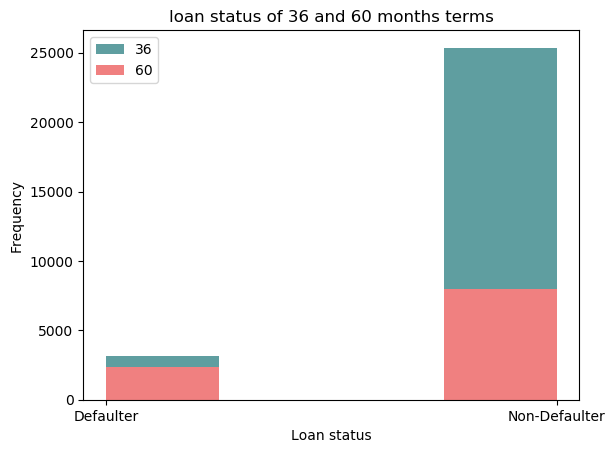

Inference:
	The defaulted loans has mostly 60 months term.


In [514]:
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.

fp = master_df[master_df.term == 36].loan_default_status
co = master_df[master_df.term == 60].loan_default_status

plt.hist(fp, bins=fp.nunique()+2, color='cadetblue')
plt.hist(co, bins=co.nunique()+2, color='lightcoral')

plt.xlabel("Loan status")
plt.ylabel("Frequency")

plt.legend(master_df.term)
plt.xticks()

plt.title('loan status of 36 and 60 months terms')
plt.show()

print('Inference:\n\tThe defaulted loans has mostly 60 months term.')

### Bivariate Analysis

###  Bivariate  Correlation metrics for all the quantitative fields

In [515]:
#Bivariate Coorelation Matrix
corr = round(master_df.corr(),2)

corr.style.background_gradient()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_util,pub_rec_bankruptcies,instal_income_perc
loan_amnt,1,0.94,0.36,0.3,0.93,0.15,0.42,0.08,-0.04,0.17,-0.05,0.07,-0.03,0.55
funded_amnt_inv,0.94,1,0.36,0.3,0.9,0.16,0.39,0.09,-0.04,0.16,-0.05,0.08,-0.04,0.53
term,0.36,0.36,1,0.45,0.1,0.11,0.08,0.08,0.01,0.05,0.01,0.07,0.01,0.02
int_rate,0.3,0.3,0.45,1,0.28,0.01,0.07,0.11,0.16,0,0.1,0.47,0.08,0.19
installment,0.93,0.9,0.1,0.28,1,0.12,0.41,0.07,-0.02,0.17,-0.04,0.1,-0.03,0.61
emp_length,0.15,0.16,0.11,0.01,0.12,1,0.18,0.06,0.01,0.1,0.06,0.01,0.06,-0.03
annual_inc,0.42,0.39,0.08,0.07,0.41,0.18,1,-0.1,0.03,0.26,-0.02,0.04,-0.02,-0.33
dti,0.08,0.09,0.08,0.11,0.07,0.06,-0.1,1,-0.03,0.29,-0.01,0.28,0,0.12
delinq_2yrs,-0.04,-0.04,0.01,0.16,-0.02,0.01,0.03,-0.03,1,0.01,0.01,-0.04,0,-0.05
open_acc,0.17,0.16,0.05,0,0.17,0.1,0.26,0.29,0.01,1,0,-0.09,0.01,-0.05


There are no strong correlation observed between different fields except for loan_amount, installment and funded_amnt_inv which is expected and obvious..

### Bivariate analysis on continuous variables

In [516]:
# Create 2 data frame one for Non-Defaulter and another for Defaulter
fully_paid_df = pd.DataFrame(master_df[master_df.loan_default_status == 'Non-Defaulter']).reset_index()
charged_off_df = pd.DataFrame(master_df[master_df.loan_default_status == 'Defaulter']).reset_index()

The correlation of loan amount and funded amount is  0.91

Line plot showing loan amnt and funded amnt from invester.



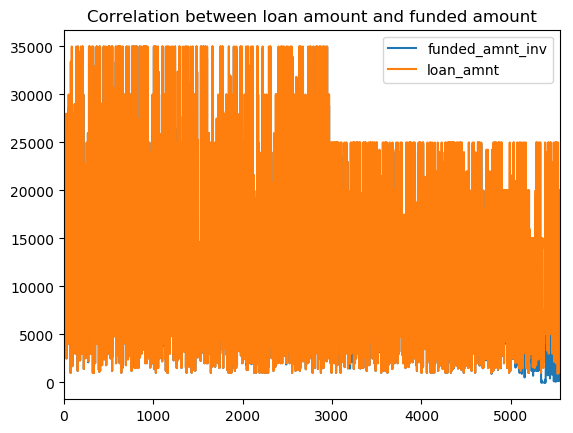


Correlation plot of loan amount and funded amount.

                 funded_amnt_inv  loan_amnt
funded_amnt_inv         1.000000   0.907442
loan_amnt               0.907442   1.000000


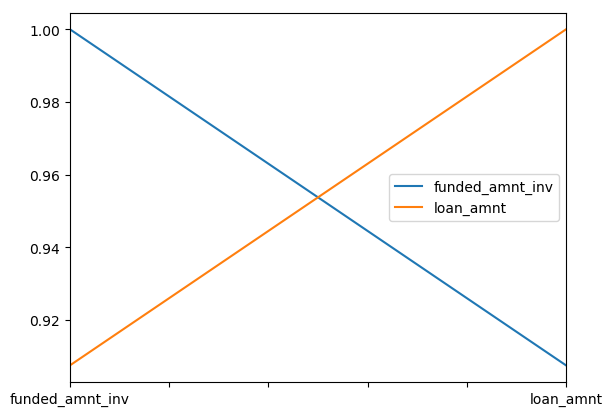

The loan amont and funded amount has higher corelation coeffeciant in the case of Defaulted loans.


In [517]:
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20, 25))

loan_fund_amnt = pd.DataFrame({'loan_amnt': charged_off_df['loan_amnt'], 'funded_amnt_inv': charged_off_df['funded_amnt_inv']})
corrcoefficiant = pearsonr(loan_fund_amnt['loan_amnt'], loan_fund_amnt['funded_amnt_inv'])
print("The correlation of loan amount and funded amount is ",
      round(corrcoefficiant[0], 2))

print("\nLine plot showing loan amnt and funded amnt from invester.\n")
loan_fund_amnt.plot(kind='line', subplots=False)
plt.title('Correlation between loan amount and funded amount')
plt.show()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

print("\nCorrelation plot of loan amount and funded amount.\n")
corr = loan_fund_amnt.corr()
print(corr)
corr.plot(kind='line', subplots=False)
plt.show()

print('The loan amont and funded amount has higher corelation coeffeciant in the case of Defaulted loans.')

### Correlation of Loan amount and funded amount of Non-Defaulted loans

The correlation of loan amount and funded amount is  0.95

Line plot showing loan amnt and funded amnt from invester.



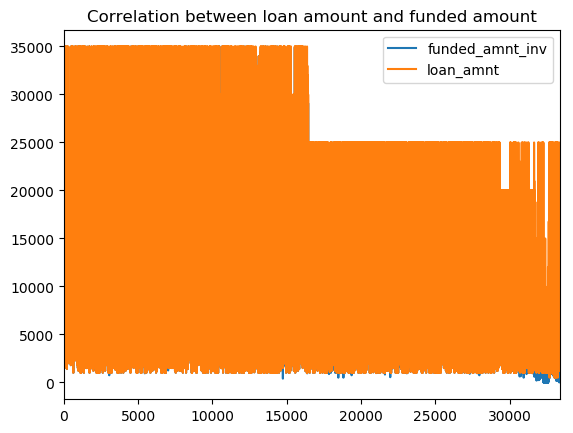


Correlation plot of loan amount and funded amount.

                 funded_amnt_inv  loan_amnt
funded_amnt_inv         1.000000   0.946416
loan_amnt               0.946416   1.000000


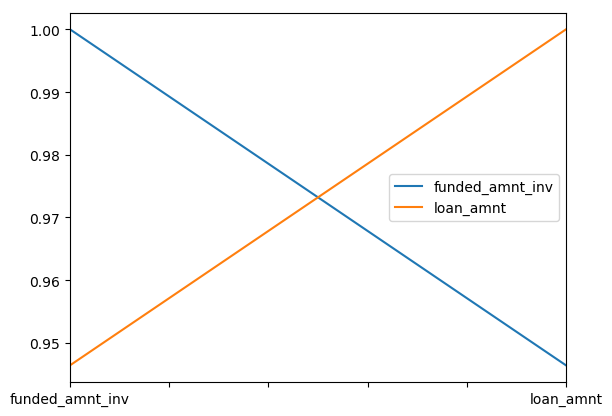

The loan amont and funded amount has higher corelation coeffeciant in the case of Non-Defaulted loans.


In [518]:
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20, 25))

loan_fund_amnt = pd.DataFrame({'loan_amnt': fully_paid_df['loan_amnt'], 'funded_amnt_inv': fully_paid_df['funded_amnt_inv']})
corrcoefficiant = pearsonr(loan_fund_amnt['loan_amnt'], loan_fund_amnt['funded_amnt_inv'])
print("The correlation of loan amount and funded amount is ",
      round(corrcoefficiant[0], 2))

print("\nLine plot showing loan amnt and funded amnt from invester.\n")
loan_fund_amnt.plot(kind='line', subplots=False)
plt.title('Correlation between loan amount and funded amount')
plt.show()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

print("\nCorrelation plot of loan amount and funded amount.\n")
corr = loan_fund_amnt.corr()
print(corr)
corr.plot(kind='line', subplots=False)
plt.show()

print('The loan amont and funded amount has higher corelation coeffeciant in the case of Non-Defaulted loans.')

### Bivariate analysis on categorical variables

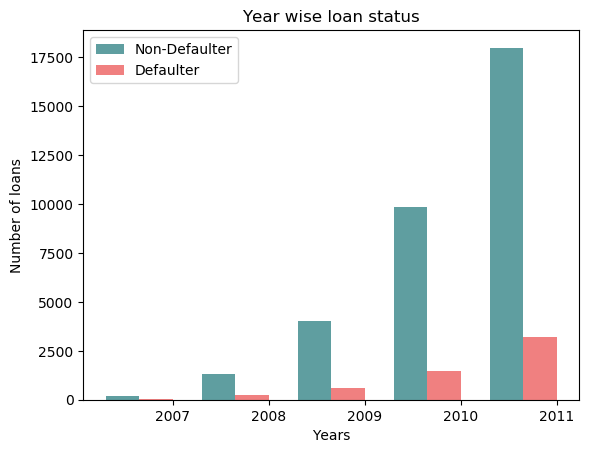

Inference:
	Year 2011 has most loans on both catagories.


In [519]:
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.

issue_d_fp = fully_paid_df.groupby(fully_paid_df.issue_d.dt.year).size()
issue_d_co = charged_off_df.groupby(charged_off_df.issue_d.dt.year).size()

ind = np.arange(max(len(issue_d_fp), len(issue_d_co)))  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(ind-width,issue_d_fp,width,color='cadetblue',label='Non-Defaulter')
ax.bar(ind,issue_d_co,width,color='lightcoral',label='Defaulter')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( (issue_d_fp.index) )
plt.xlabel('Years')
plt.ylabel('Number of loans')
plt.title('Year wise loan status')
plt.legend()

plt.show()

print('Inference:\n\tYear 2011 has most loans on both catagories.')

### Analysis of Verification Status and Loan Status

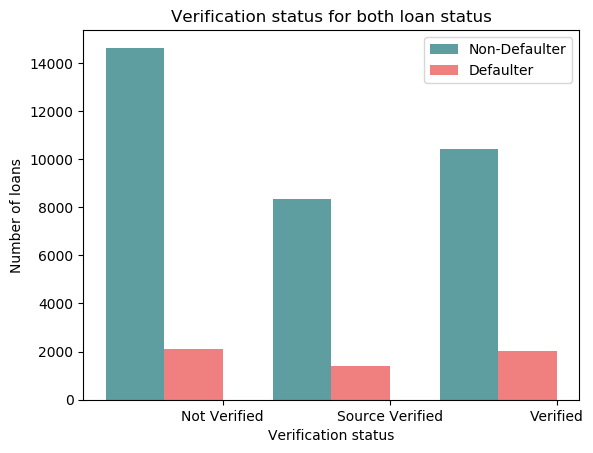

In [520]:
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.

verification_status_fp = fully_paid_df.groupby(fully_paid_df.verification_status).size()
verification_status_co = charged_off_df.groupby(charged_off_df.verification_status).size()

ind = np.arange(max(len(verification_status_fp), len(verification_status_co)))  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(ind-width, verification_status_fp, width, color='cadetblue', label='Non-Defaulter')
ax.bar(ind, verification_status_co, width, color='lightcoral', label='Defaulter')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( (verification_status_fp.index) )
plt.xlabel('Verification status')
plt.ylabel('Number of loans')
plt.title('Verification status for both loan status')
plt.legend()

plt.show()


### Analysis of Sub Grade and loan status

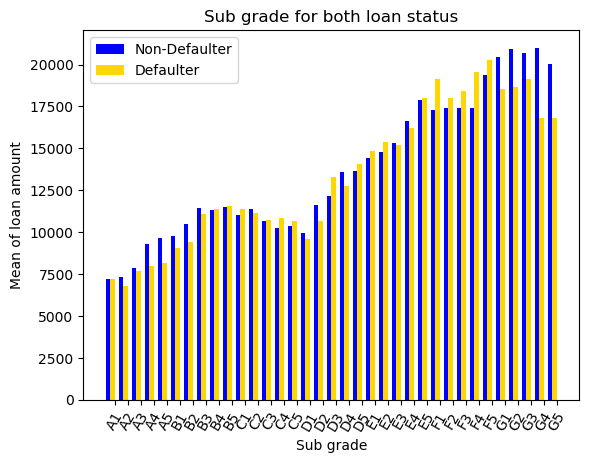

Inference:
	Lower the grade higher is the average loan amount and risk for defaulting except for few exceptions


In [521]:
# grouby(grade,loan_status) take average  of loan_amount

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(200,25))

g1 = fully_paid_df.groupby(fully_paid_df.sub_grade).loan_amnt.mean()
g2 = charged_off_df.groupby(charged_off_df.sub_grade).loan_amnt.mean()

xlabel = 'Sub grade'
ylabel = 'Mean of loan amount'
title = 'Sub grade for both loan status'

ind = np.arange(max(len(g1), len(g2)))  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(ind-width, g1, width, color='blue', label='Non-Defaulter')
ax.bar(ind, g2, width, color='gold', label='Defaulter')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels( (g1.index) )

plt.xticks(rotation=60)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()

plt.show()

print('Inference:\n\tLower the grade higher is the average loan amount and risk for defaulting except for few exceptions')

### Analysis of Employment duration and loan status

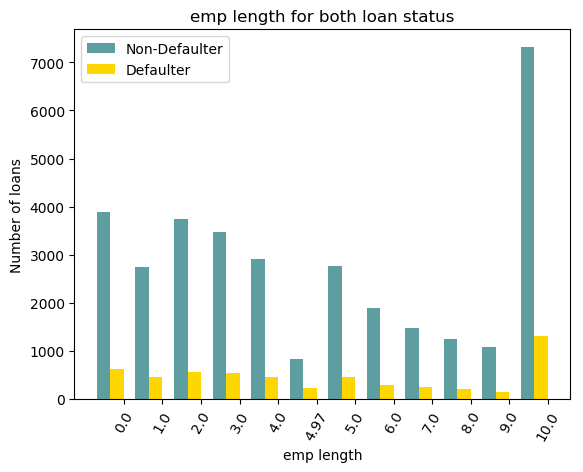

Inference:
	Employees with longer duration are processing more loans in both catagories
	There is no much deviation in defaulting rate based on employees’ experience.


In [522]:
# grouby(emp_length,loan_status) take average  of loan_amount

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(200,25))

g1 = round(fully_paid_df.groupby(fully_paid_df.emp_length).size())
g2 = round(charged_off_df.groupby(charged_off_df.emp_length).size())

xlabel = 'emp length'
ylabel = 'Number of loans'
title = 'emp length for both loan status'

ind = np.arange(max(len(g1), len(g2)))  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(ind-width, g1, width, color='cadetblue', label='Non-Defaulter')
ax.bar(ind, g2, width, color='gold', label='Defaulter')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels( (g1.index) )

plt.xticks(rotation=60)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()

plt.show()

print('Inference:\n\tEmployees with longer duration are processing more loans in both catagories')
print('\tThere is no much deviation in defaulting rate based on employees’ experience.')

### Analysis of state, purpose and loan status

In [523]:
# Groupby(State, purpose, loan_status) : Take count of loan_status

# Create pivot table first
charged_off_df["purpose"] = charged_off_df["purpose"].astype("category")
charged_off_pvt_df = pd.pivot_table(charged_off_df, index=["purpose"], values="loan_status", columns="addr_state", aggfunc=[len])
charged_off_pvt_df.columns = charged_off_pvt_df.columns.droplevel(0)
charged_off_pvt_df

addr_state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
purpose,,,,,,,,,,,,,,,,,,,,,
car,NaN,1.0,3.0,4.0,26.0,2.0,3.0,NaN,NaN,16.0,...,NaN,NaN,11.0,1.0,4.0,NaN,4.0,1.0,NaN,NaN
credit_card,3.0,7.0,2.0,17.0,138.0,9.0,10.0,4.0,3.0,44.0,...,3.0,1.0,25.0,3.0,11.0,1.0,17.0,8.0,3.0,1.0
debt_consolidation,7.0,25.0,9.0,55.0,546.0,53.0,50.0,7.0,2.0,232.0,...,6.0,1.0,135.0,15.0,90.0,5.0,66.0,33.0,9.0,1.0
educational,NaN,1.0,1.0,3.0,10.0,2.0,NaN,NaN,NaN,9.0,...,NaN,NaN,5.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
home_improvement,NaN,6.0,2.0,2.0,57.0,6.0,9.0,NaN,NaN,38.0,...,NaN,NaN,18.0,2.0,12.0,NaN,3.0,2.0,1.0,1.0
house,NaN,NaN,NaN,2.0,14.0,1.0,1.0,NaN,NaN,7.0,...,NaN,NaN,4.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN
major_purchase,NaN,3.0,NaN,6.0,34.0,2.0,5.0,NaN,NaN,30.0,...,NaN,NaN,17.0,NaN,3.0,NaN,4.0,3.0,1.0,NaN
medical,1.0,1.0,1.0,1.0,17.0,1.0,1.0,NaN,NaN,9.0,...,NaN,NaN,6.0,NaN,4.0,NaN,3.0,1.0,1.0,NaN
moving,NaN,1.0,NaN,2.0,23.0,NaN,NaN,1.0,NaN,4.0,...,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [524]:
# Second pivot table
fully_paid_df["purpose"] = fully_paid_df["purpose"].astype("category")
fully_paid_pvt_df = pd.pivot_table(fully_paid_df, index=["purpose"], values="loan_status", columns="addr_state", aggfunc=[len])
fully_paid_pvt_df.columns = fully_paid_pvt_df.columns.droplevel(0)
fully_paid_pvt_df

addr_state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
purpose,,,,,,,,,,,,,,,,,,,,,
car,1.0,21.0,14.0,31.0,199.0,28.0,30.0,4.0,5.0,98.0,...,2.0,1.0,105.0,11.0,57.0,1.0,28.0,22.0,8.0,4.0
credit_card,8.0,42.0,26.0,110.0,894.0,119.0,75.0,37.0,11.0,291.0,...,10.0,2.0,345.0,35.0,161.0,6.0,101.0,66.0,19.0,7.0
debt_consolidation,26.0,199.0,95.0,304.0,2859.0,324.0,290.0,104.0,42.0,1023.0,...,22.0,3.0,1023.0,104.0,592.0,22.0,331.0,173.0,85.0,36.0
educational,NaN,3.0,1.0,4.0,34.0,7.0,4.0,NaN,NaN,19.0,...,NaN,1.0,11.0,2.0,5.0,NaN,7.0,2.0,NaN,NaN
home_improvement,10.0,34.0,21.0,63.0,316.0,35.0,56.0,9.0,15.0,207.0,...,3.0,1.0,191.0,17.0,97.0,3.0,52.0,34.0,8.0,3.0
house,NaN,6.0,1.0,10.0,48.0,11.0,5.0,2.0,1.0,37.0,...,1.0,NaN,15.0,2.0,12.0,NaN,6.0,5.0,NaN,1.0
major_purchase,3.0,26.0,21.0,45.0,282.0,34.0,44.0,8.0,5.0,142.0,...,2.0,2.0,143.0,5.0,61.0,4.0,34.0,23.0,12.0,13.0
medical,2.0,3.0,5.0,18.0,114.0,16.0,8.0,1.0,1.0,40.0,...,NaN,NaN,56.0,9.0,11.0,1.0,11.0,3.0,2.0,2.0
moving,NaN,3.0,NaN,17.0,85.0,13.0,8.0,4.0,2.0,39.0,...,NaN,NaN,29.0,1.0,21.0,1.0,6.0,5.0,2.0,NaN


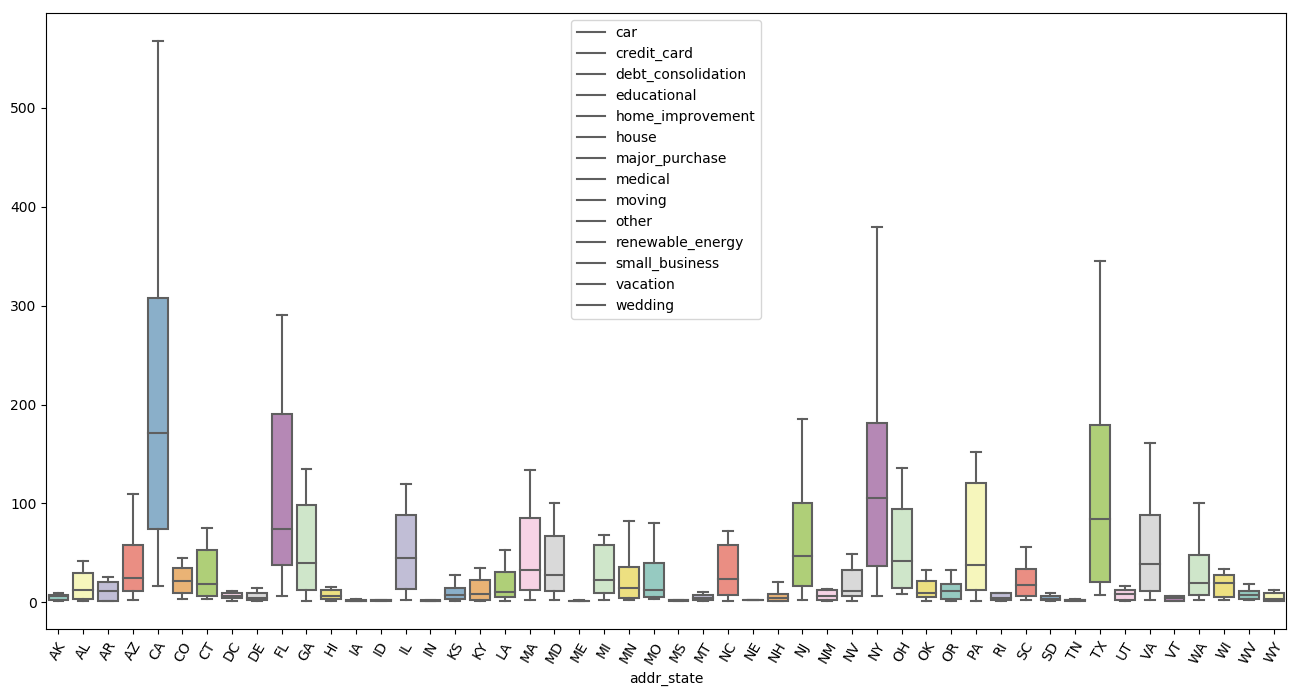

In [525]:
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(16,8))
sns.boxplot(data=fully_paid_pvt_df, showfliers=False, palette="Set3")
plt.xticks(rotation=60)
plt.legend(fully_paid_pvt_df.index)
plt.show()

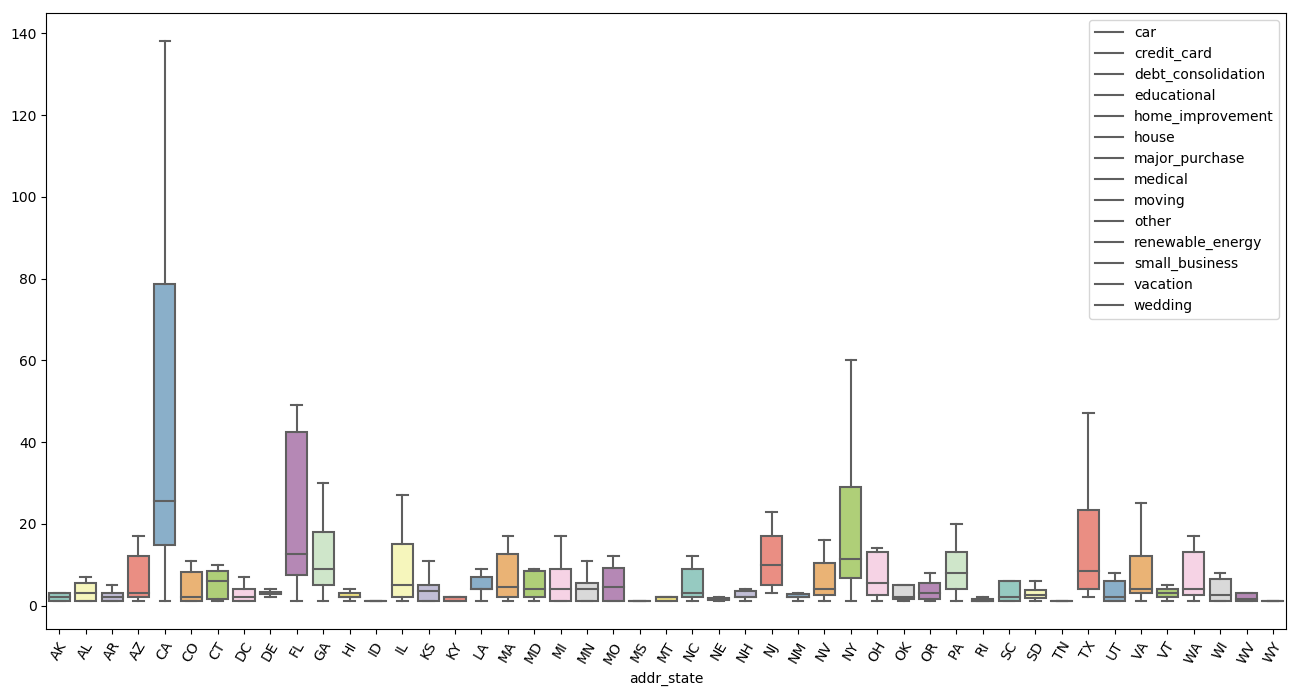

Inference:
	The loan taken for debt consolidation has highest chances of defaulting
	The state CA has highest percentage of defaulters


In [526]:
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=charged_off_pvt_df, showfliers=False, palette="Set3")
plt.xticks(rotation=60)
plt.legend(charged_off_pvt_df.index, loc=1)
plt.show()

# The loan taken for debt consolidation has highest chances of defaulting
# The state CA has highest percentage of defaulters
print('Inference:\n\tThe loan taken for debt consolidation has highest chances of defaulting')
print('\tThe state CA has highest percentage of defaulters')

### Analysis of home ownership and loan status

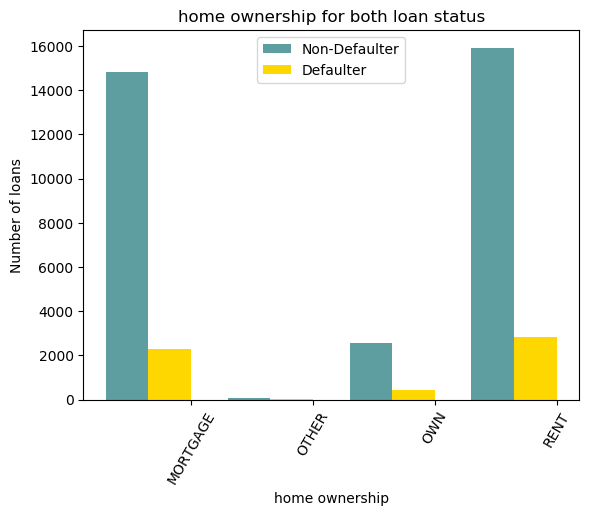

Inference:
	Applicant who are in rental homes are more likely to default followed by mortgage.


In [527]:
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(200,25))

g1 = round(fully_paid_df.groupby(fully_paid_df.home_ownership).size())
g2 = round(charged_off_df.groupby(charged_off_df.home_ownership).size())

xlabel = 'home ownership'
ylabel = 'Number of loans'
title = 'home ownership for both loan status'

ind = np.arange(max(len(g1), len(g2)))  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(ind-width, g1, width, color='cadetblue', label='Non-Defaulter')
ax.bar(ind, g2, width, color='gold', label='Defaulter')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels( (g1.index) )

plt.xticks(rotation=60)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()

plt.show()

print('Inference:\n\tApplicant who are in rental homes are more likely to default followed by mortgage.')

### Analysis of address, verification status, home ownership and loan status

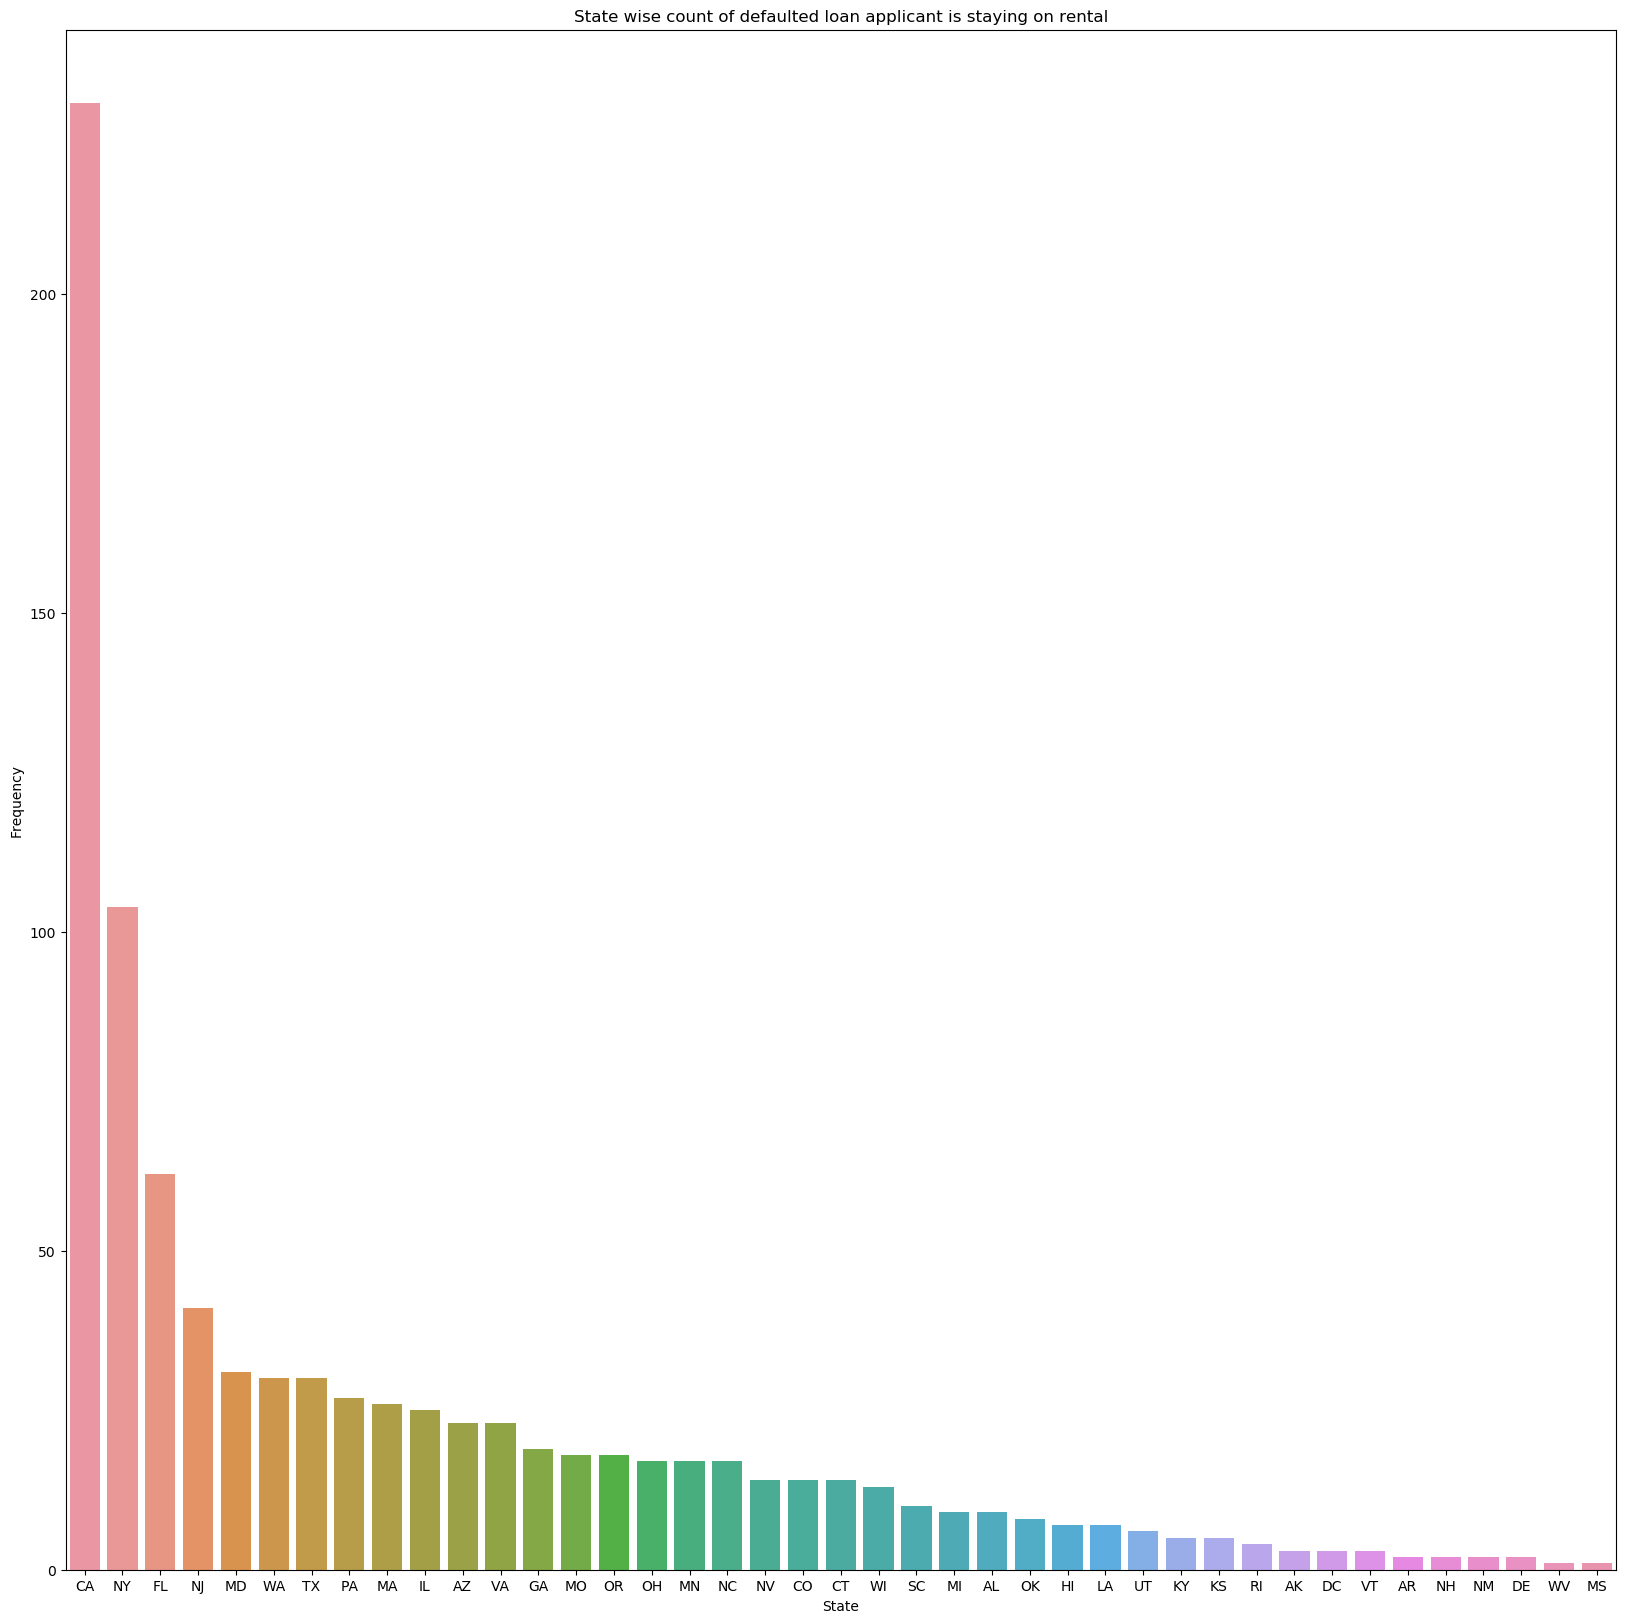

Inference: The State CA has maximum number of defaulted loan applicant staying on rental.


In [528]:
not_verified = charged_off_df.loc[fully_paid_df.verification_status == 'Not Verified']
rent = pd.DataFrame(not_verified[not_verified.home_ownership == 'RENT'])
g1 = pd.DataFrame(rent.addr_state.value_counts())
# Plot year wise bar chart of issue_d column 
draw_bar_chart(g1, g1.index, "addr_state", 20, 20,
               'State wise count of defaulted loan applicant is staying on rental',
               'State', 'Frequency', None,
               'Inference: The State CA has maximum number of defaulted loan applicant staying on rental.',
              True)

### Analysis of verification status and loan status based on annual income

In [529]:
# Groupby(verification status,loan_status) : Take average of annual_inc

# Create pivot table first
charged_off_pvt_df = pd.pivot_table(charged_off_df, index=["verification_status"], values="annual_inc", columns="loan_default_status", aggfunc=[np.mean])
charged_off_pvt_df.columns = charged_off_pvt_df.columns.droplevel(0)
charged_off_pvt_df

loan_default_status,Defaulter
verification_status,
Not Verified,52635.181697
Source Verified,57112.503800
Verified,66787.825280


In [530]:
# Inference:
# in each of the verification_status group(Not verified,source verified,verified), Fully paid always has higher average annual_inc than charged off
fully_paid_pvt_df = pd.pivot_table(fully_paid_df, index=["verification_status"], values="annual_inc", columns="loan_default_status", aggfunc=[np.mean])
fully_paid_pvt_df.columns = fully_paid_pvt_df.columns.droplevel(0)
fully_paid_pvt_df

loan_default_status,Non-Defaulter
verification_status,
Not Verified,58669.808540
Source Verified,63014.910050
Verified,75343.250518


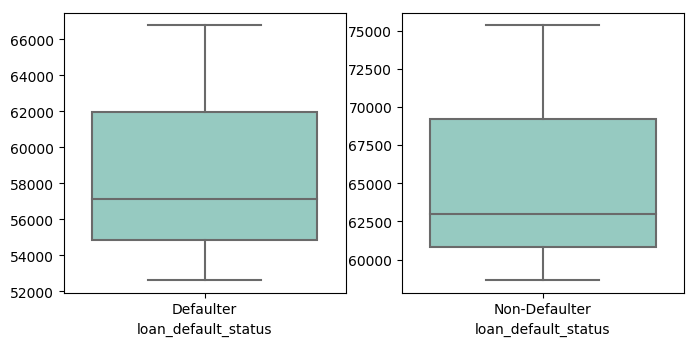

In [531]:
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(8,8))

plt.subplot(2, 2, 1)
sns.boxplot(data=charged_off_pvt_df, showfliers=False, palette="Set3")

plt.subplot(2, 2, 2)
sns.boxplot(data=fully_paid_pvt_df, showfliers=False, palette="Set3")

plt.xticks()
plt.show()

In [532]:
loan_status_pvt_df = pd.pivot_table(master_df, index=["interest_rate_bracket"], values="instal_income_perc", columns=["loan_default_status","term"], aggfunc=[np.median])
loan_status_pvt_df.columns = loan_status_pvt_df.columns.droplevel(0)
print("\nInference from below table:\n\t For each term term loan the installment to income ration of for each of the interest slabs  are as below.\n\t This influences whether a loan is likely to be defaulted or not:\n")
loan_status_pvt_df



Inference from below table:
	 For each term term loan the installment to income ration of for each of the interest slabs  are as below.
	 This influences whether a loan is likely to be defaulted or not:



loan_default_status   Defaulter           Non-Defaulter          
term                         36        60            36        60
interest_rate_bracket                                            
10-15                  6.594200  6.645357      6.132338  5.800984
15-20                  7.258667  7.203643      7.100320  6.657143
20-25                  9.570312  9.347769      7.218121  8.037000
5-10                   5.415128  4.921428      4.951257  3.875707

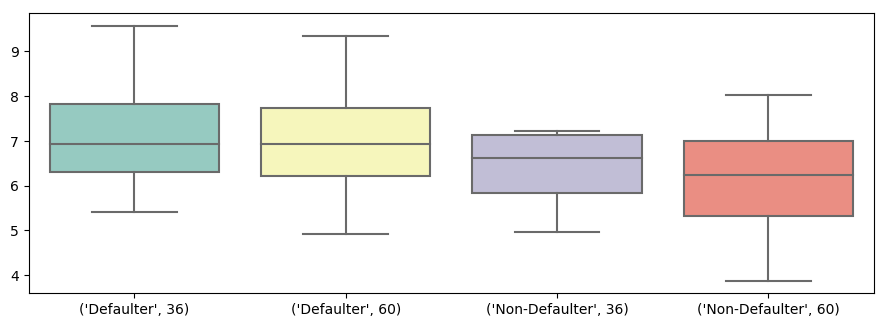

In [533]:
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(24,8))

plt.subplot(2, 2, 1)
sns.boxplot(data=loan_status_pvt_df, showfliers=False, palette="Set3")
plt.show()